In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf 

In [2]:
cols = ["lenght", "fWidth", "fsize", "fconc", "fconcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
with zipfile.ZipFile(r'C:\Users\LIGHTRQX\Desktop\code\magic+gamma+telescope.zip') as z:  # Raw string for path
    file_name = z.namelist()[0]
    with z.open(file_name) as f:
        df = pd.read_csv(f, names=cols) 

print(df.head())
print(df.info())


     lenght    fWidth   fsize   fconc  fconcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lenght    19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconcl   

In [3]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

lenght    fWidth   fsize   fconc  fconcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

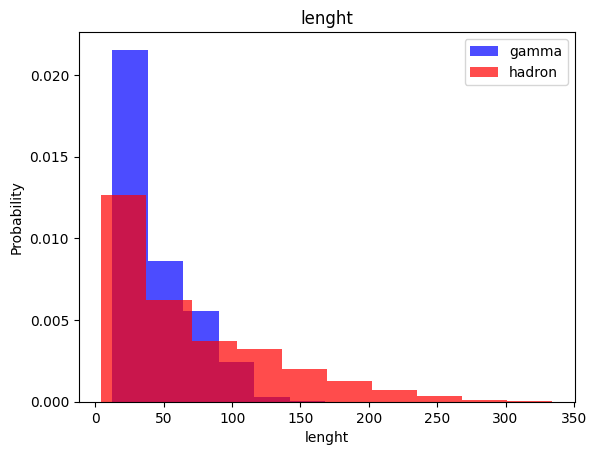

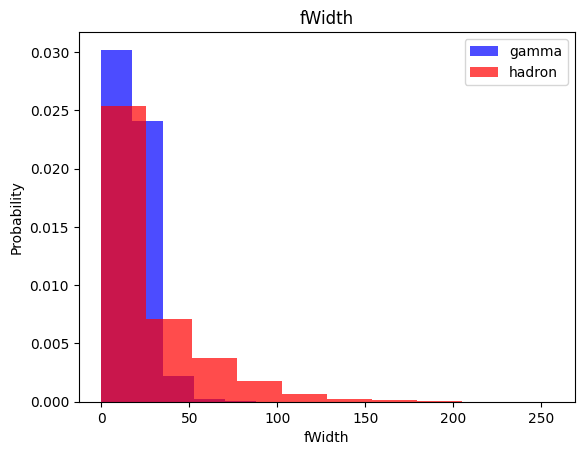

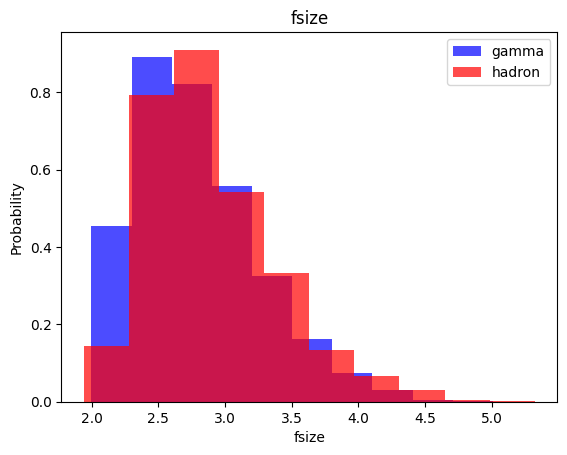

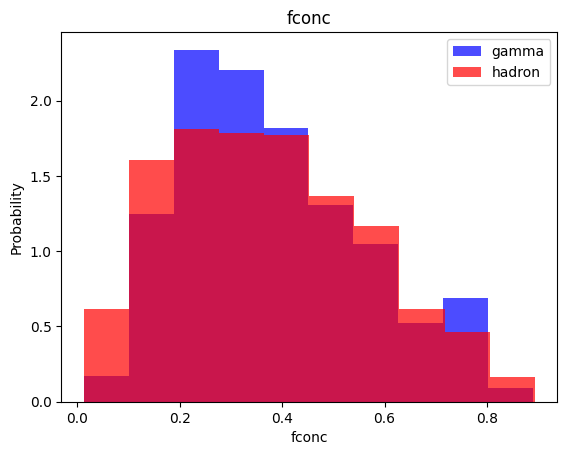

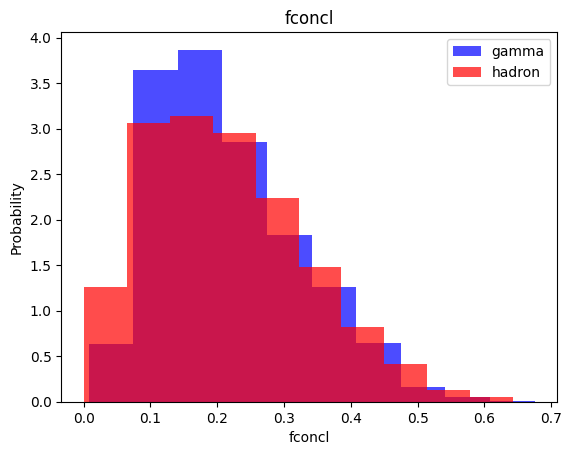

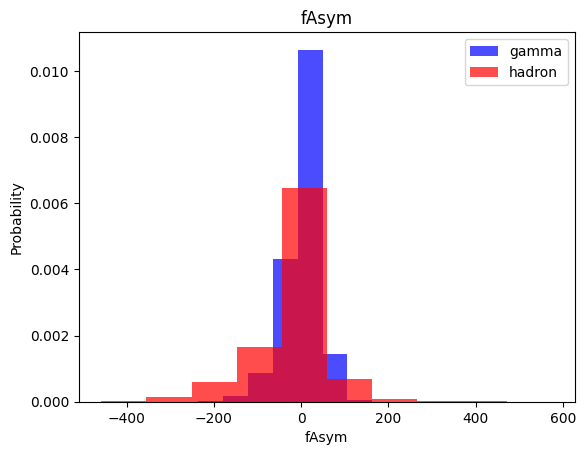

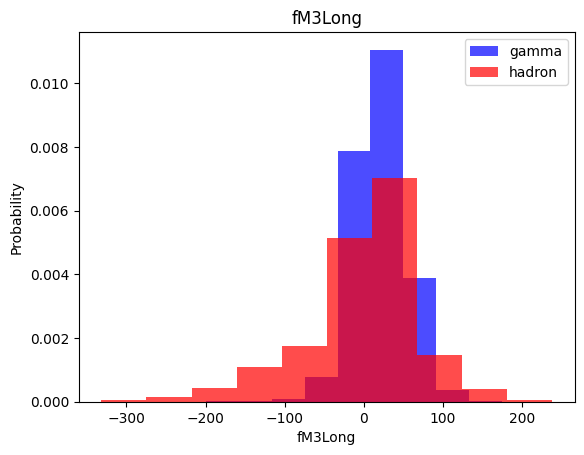

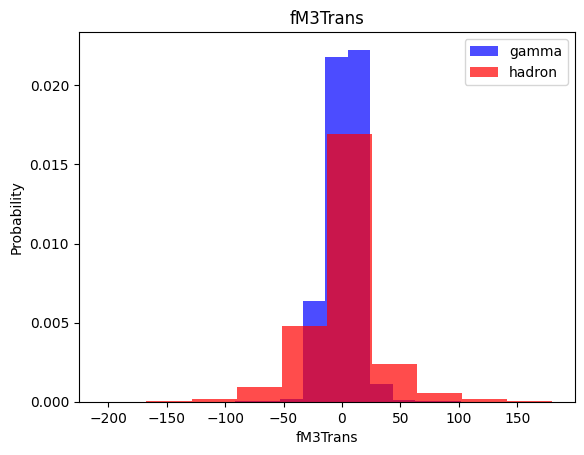

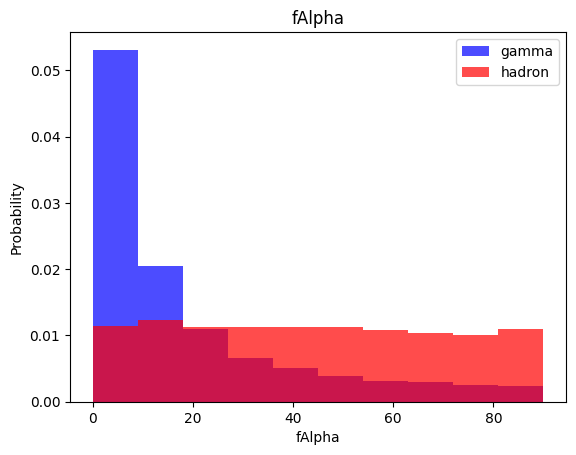

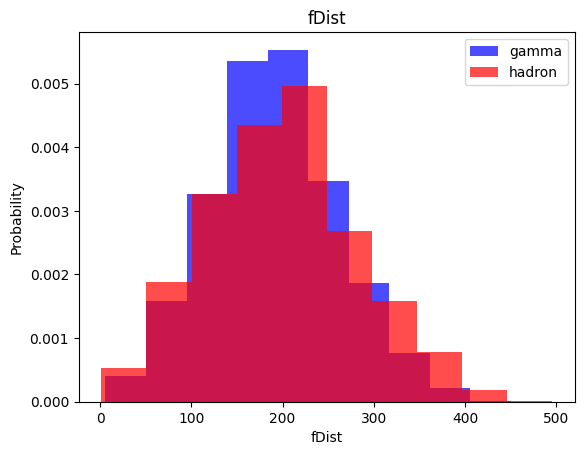

In [4]:
import matplotlib.pyplot as plt

for label in cols[:-1]:  # Assuming you want to loop through feature columns
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

train validation test data set splitting it 

In [5]:
train, valid, test =np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\LIGHTRQX\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_datadset(dataframe, oversample=False):
    if isinstance(dataframe, np.ndarray):
        dataframe = pd.DataFrame(dataframe)  
    x = dataframe.iloc[:, :-1].values 
    y = dataframe.iloc[:, -1].values   

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y


In [7]:
train, x_train, y_train = scale_datadset(train, oversample=True)
valid, x_valid, y_valid = scale_datadset(valid, oversample=False)
test, x_test, y_test = scale_datadset(test, oversample=False)


knn model

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier (n_neighbors= 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred  = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1363
           1       0.85      0.86      0.85      2441

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



naive bayes model

In [11]:
 from sklearn.naive_bayes import GaussianNB

In [12]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [13]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.50      1363
           1       0.72      0.89      0.80      2441

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804



log regression

In [14]:
 from sklearn.linear_model import LogisticRegression

In [15]:
Ig_model = LogisticRegression()
Ig_model = Ig_model.fit(x_train, y_train)

In [16]:
y_pred = Ig_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1363
           1       0.84      0.82      0.83      2441

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



support vector mechanics

In [18]:
svm_model = svc()
svm_model = svm_model.fit(x_train, y_train)

NameError: name 'svc' is not defined

In [19]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

NameError: name 'svm_model' is not defined

nueral net

In [20]:
import tensorflow as tf

def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):  
    input_shape = (x_train.shape[1],)  # Ensure dynamic input shape
    
    nn_model = tf.keras.Sequential([  
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'), 
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                           validation_split=0.2, verbose=1)  

    return nn_model, history  



In [21]:
def plot_training_history(history):
    # Ensure 'history' has the required keys
    print("Available keys in history:", history.history.keys())

    # Extract loss and accuracy if they exist
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    accuracy = history.history.get('accuracy', history.history.get('categorical_accuracy', []))
    val_accuracy = history.history.get('val_accuracy', history.history.get('val_categorical_accuracy', []))

    # Ensure there is training data
    if not loss or not accuracy:
        raise ValueError("Loss or accuracy data missing. Check model training.")

    # Create epochs range
    epochs = range(1, len(loss) + 1)

    # Create a figure
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')


    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')
    plt.show()


In [22]:
model, history = train_model(x_train, y_train, num_nodes=64, dropout_prob=0.3, lr=0.001, batch_size=32, epochs=10)


Epoch 1/10


c:\Users\LIGHTRQX\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7217 - loss: 0.5427 - val_accuracy: 0.6221 - val_loss: 0.6362
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8205 - loss: 0.4088 - val_accuracy: 0.6571 - val_loss: 0.6045
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.3968 - val_accuracy: 0.6864 - val_loss: 0.5909
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8358 - loss: 0.3824 - val_accuracy: 0.7181 - val_loss: 0.5472
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.3778 - val_accuracy: 0.7447 - val_loss: 0.4756
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8434 - loss: 0.3676 - val_accuracy: 0.7467 - val_loss: 0.4920
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.3657 - val_accuracy: 0.7305 - val_loss: 0.5076
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.3615 - val_accuracy: 0.6969 - val_

Training model: nodes=16, dropout=0, lr=0.01, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7865 - loss: 0.4562 - val_accuracy: 0.7962 - val_loss: 0.3884
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8481 - loss: 0.3609 - val_accuracy: 0.7531 - val_loss: 0.4604
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3519 - val_accuracy: 0.6719 - val_loss: 0.6112
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.3407 - val_accuracy: 0.7073 - val_loss: 0.5662
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8600 - loss: 0.3305 - val_accuracy: 0.6878 - val_loss: 0.5793
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.3312 - val_accuracy: 0.7814 - val_loss: 0.4059
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8651 - loss: 0.3178 - val_accuracy: 0.7545 - val_loss: 0.5255
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━

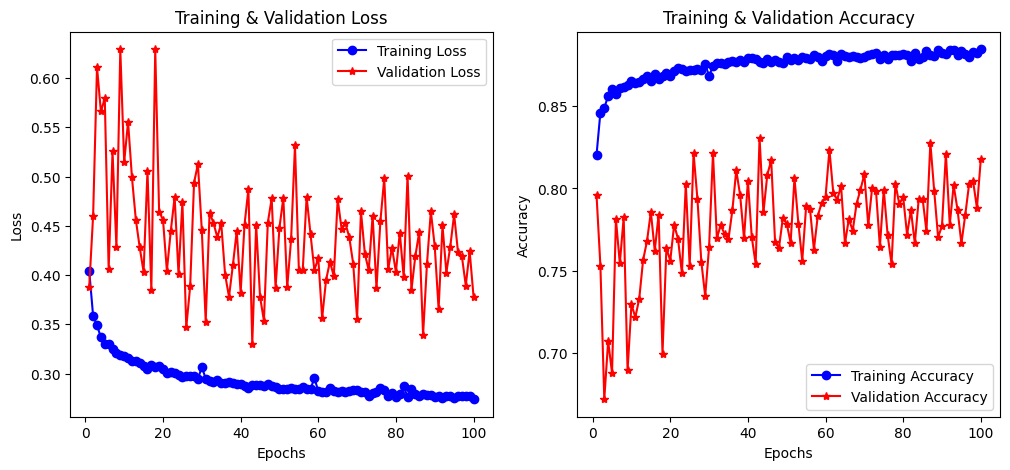

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8711 - loss: 0.3154
Training model: nodes=16, dropout=0, lr=0.01, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7862 - loss: 0.4552 - val_accuracy: 0.7184 - val_loss: 0.5760
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8483 - loss: 0.3546 - val_accuracy: 0.7201 - val_loss: 0.5763
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3568 - val_accuracy: 0.7575 - val_loss: 0.4774
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.3322 - val_accuracy: 0.7002 - val_loss: 0.5961
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8622 - loss: 0.3353 - val_accuracy: 0.7225 - val_loss: 0.5162
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3245 - val_accuracy: 0.7248 - val_loss: 0.5008
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3256 - 

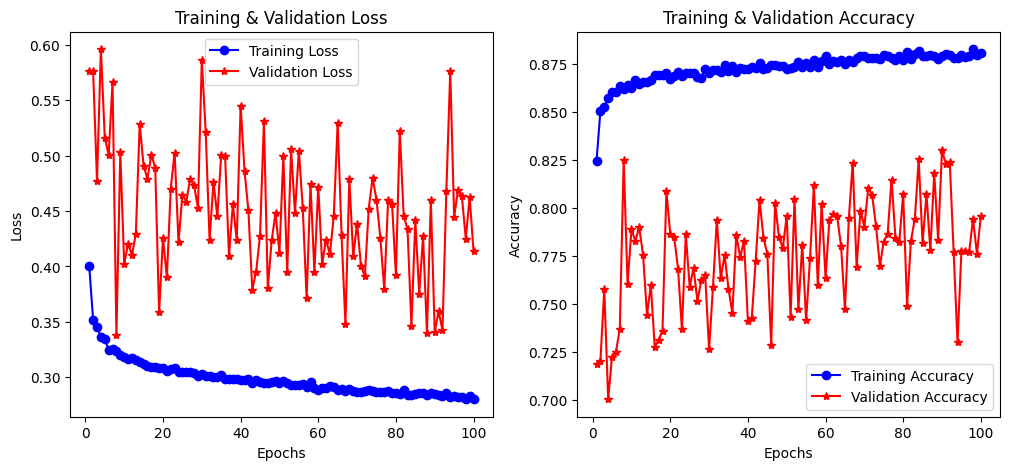

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8667 - loss: 0.3120
Training model: nodes=16, dropout=0, lr=0.01, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7583 - loss: 0.5056 - val_accuracy: 0.7302 - val_loss: 0.5352
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 0.3702 - val_accuracy: 0.7673 - val_loss: 0.4832
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3497 - val_accuracy: 0.7245 - val_loss: 0.5453
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3393 - val_accuracy: 0.7942 - val_loss: 0.3916
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3347 - val_accuracy: 0.7356 - val_loss: 0.4998
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3307 - val_accuracy: 0.7110 - val_loss: 0.5377
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3217 - val_accuracy:

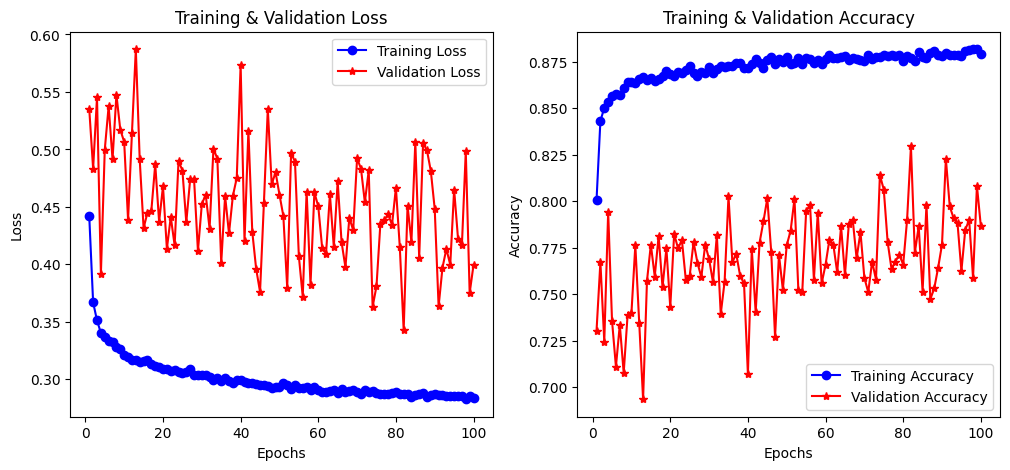

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8712 - loss: 0.3041
Training model: nodes=16, dropout=0, lr=0.005, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7813 - loss: 0.4697 - val_accuracy: 0.7380 - val_loss: 0.5358
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8445 - loss: 0.3612 - val_accuracy: 0.6969 - val_loss: 0.5835
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8542 - loss: 0.3429 - val_accuracy: 0.7140 - val_loss: 0.5595
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.8564 - loss: 0.3310 - val_accuracy: 0.7107 - val_loss: 0.5462
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8591 - loss: 0.3277 - val_accuracy: 0.7225 - val_loss: 0.5345
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8592 - loss: 0.3293 - val_accuracy: 0.7824 - val_loss: 0.4146
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8598 - loss: 0.

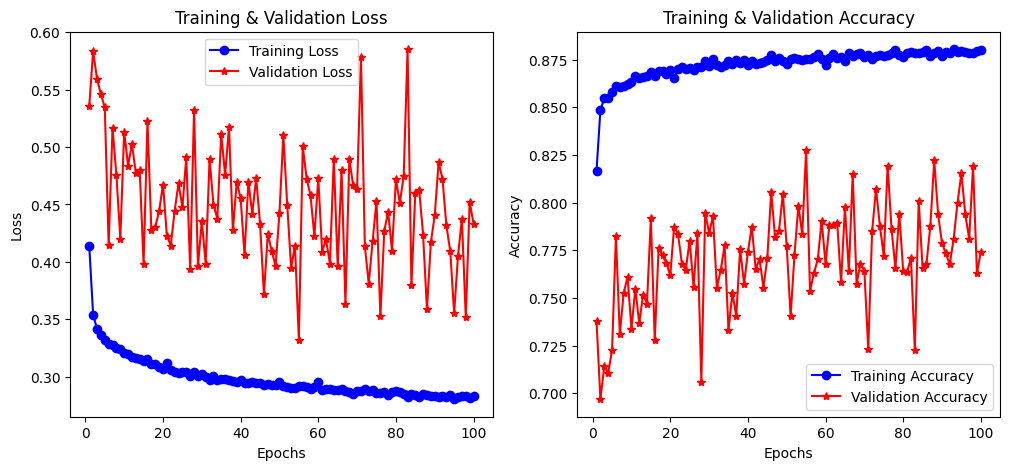

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.3112
Training model: nodes=16, dropout=0, lr=0.005, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7709 - loss: 0.4867 - val_accuracy: 0.6450 - val_loss: 0.6351
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8336 - loss: 0.3812 - val_accuracy: 0.6706 - val_loss: 0.6400
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3661 - val_accuracy: 0.6706 - val_loss: 0.6011
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3460 - val_accuracy: 0.6847 - val_loss: 0.5856
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3414 - val_accuracy: 0.7336 - val_loss: 0.5013
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 0.3442 - val_accuracy: 0.7541 - val_loss: 0.4599
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 0.3369 - v

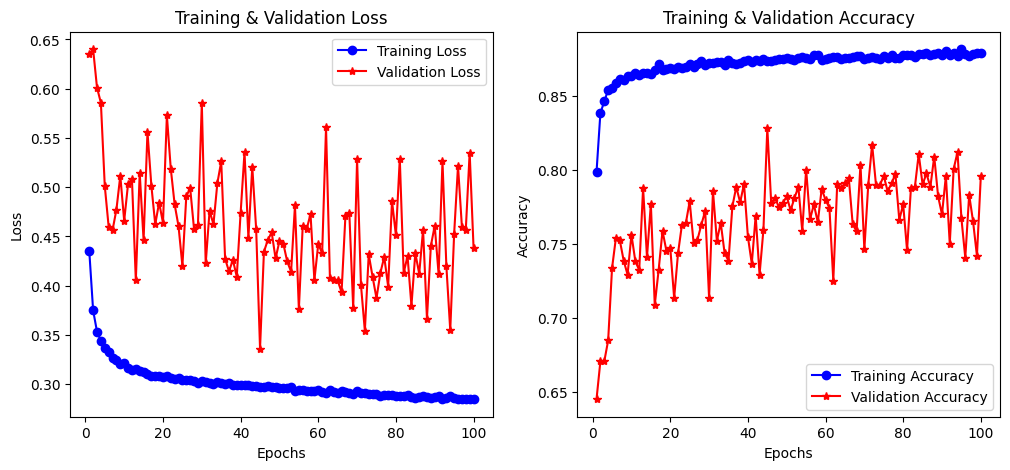

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8667 - loss: 0.3099
Training model: nodes=16, dropout=0, lr=0.005, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7178 - loss: 0.5472 - val_accuracy: 0.6591 - val_loss: 0.6198
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8329 - loss: 0.3815 - val_accuracy: 0.7050 - val_loss: 0.5619
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.3625 - val_accuracy: 0.7151 - val_loss: 0.5494
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3460 - val_accuracy: 0.7100 - val_loss: 0.5558
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.3387 - val_accuracy: 0.7228 - val_loss: 0.5309
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3421 - val_accuracy: 0.7140 - val_loss: 0.5450
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.3313 - val_accuracy

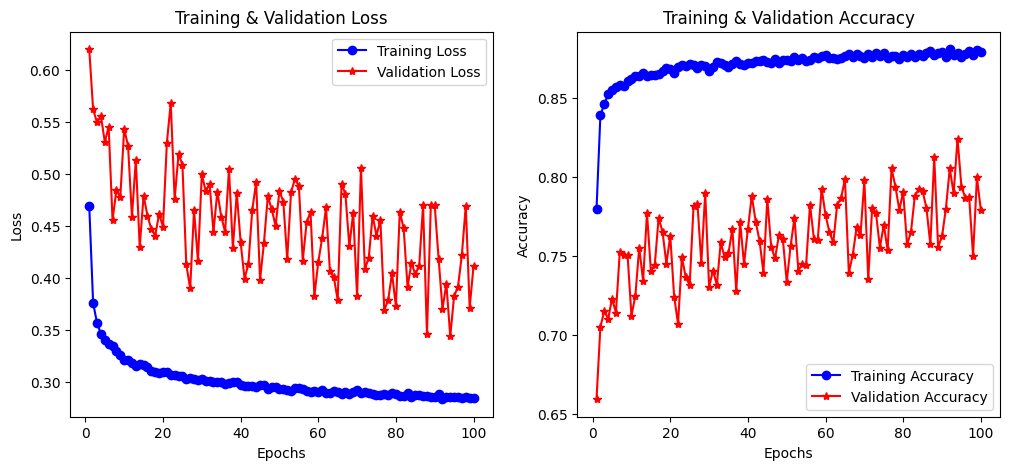

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3077
Training model: nodes=16, dropout=0, lr=0.001, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7211 - loss: 0.5529 - val_accuracy: 0.6069 - val_loss: 0.6823
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8138 - loss: 0.4107 - val_accuracy: 0.6342 - val_loss: 0.6534
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.3876 - val_accuracy: 0.7343 - val_loss: 0.5187
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8509 - loss: 0.3661 - val_accuracy: 0.7279 - val_loss: 0.5336
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8493 - loss: 0.3561 - val_accuracy: 0.7275 - val_loss: 0.5505
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.3597 - val_accuracy: 0.7272 - val_loss: 0.5338
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8553 - loss: 0.3413 - v

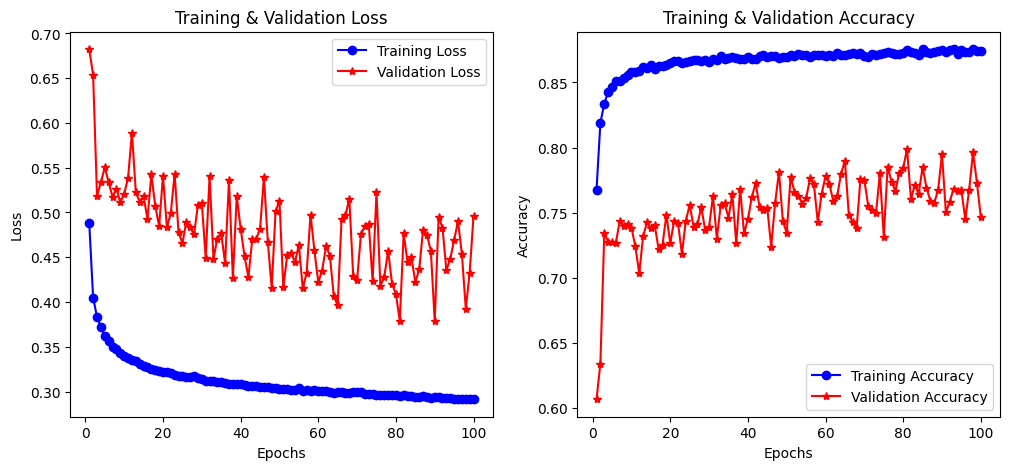

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.2967
Training model: nodes=16, dropout=0, lr=0.001, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6791 - loss: 0.6527 - val_accuracy: 0.6015 - val_loss: 0.6740
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4351 - val_accuracy: 0.6369 - val_loss: 0.6159
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.3964 - val_accuracy: 0.6760 - val_loss: 0.5931
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3734 - val_accuracy: 0.6935 - val_loss: 0.5709
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.3734 - val_accuracy: 0.7363 - val_loss: 0.5163
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3530 - val_accuracy: 0.7245 - val_loss: 0.5523
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3497 - v

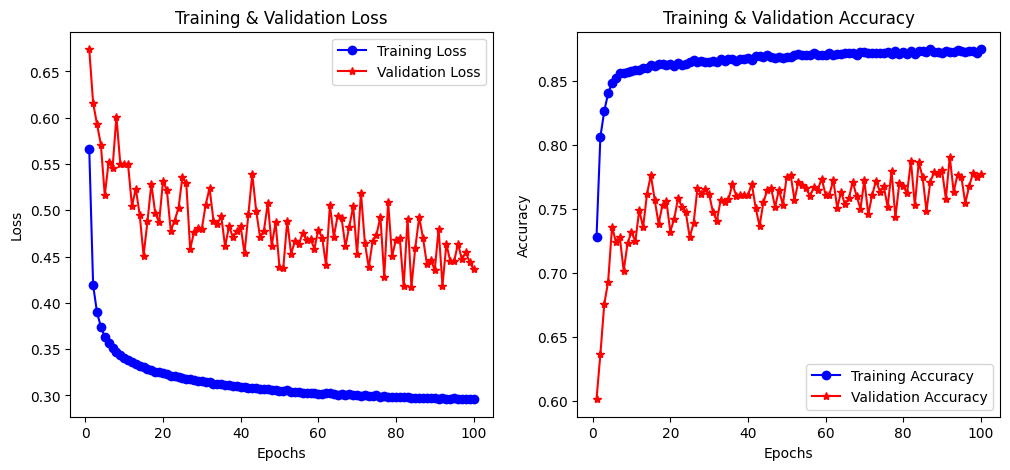

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.2988
Training model: nodes=16, dropout=0, lr=0.001, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6560 - loss: 0.6499 - val_accuracy: 0.4725 - val_loss: 0.7528
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7788 - loss: 0.4852 - val_accuracy: 0.5992 - val_loss: 0.6805
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4212 - val_accuracy: 0.6463 - val_loss: 0.6206
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8230 - loss: 0.3927 - val_accuracy: 0.6639 - val_loss: 0.5968
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.3693 - val_accuracy: 0.6928 - val_loss: 0.5572
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.3807 - val_accuracy: 0.6965 - val_loss: 0.5618
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3708 - val_accuracy: 

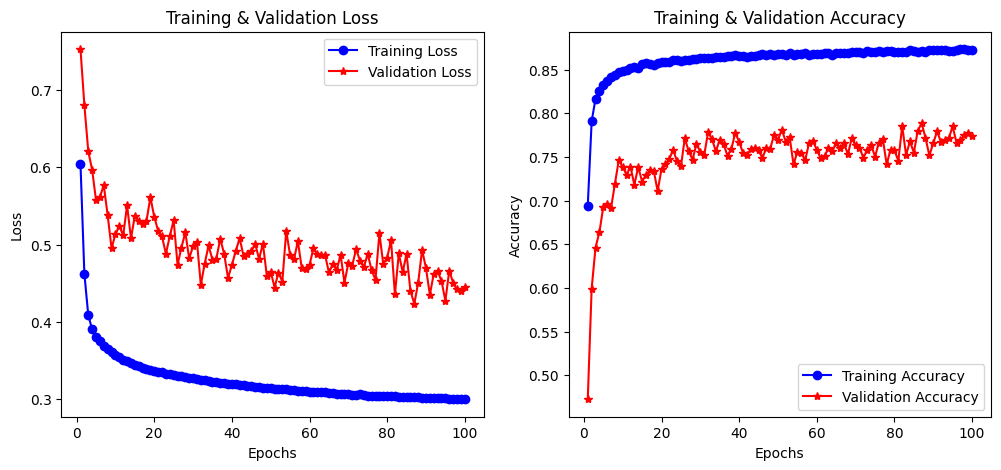

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3057
Training model: nodes=16, dropout=0.2, lr=0.01, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7623 - loss: 0.4916 - val_accuracy: 0.7241 - val_loss: 0.4952
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8316 - loss: 0.3973 - val_accuracy: 0.6935 - val_loss: 0.5716
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8325 - loss: 0.3912 - val_accuracy: 0.7083 - val_loss: 0.5465
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8345 - loss: 0.3820 - val_accuracy: 0.7481 - val_loss: 0.4263
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8355 - loss: 0.3832 - val_accuracy: 0.7528 - val_loss: 0.4695
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8463 - loss: 0.3679 - val_accuracy: 0.7599 - val_loss: 0.4136
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8471 - loss: 0.3695 - 

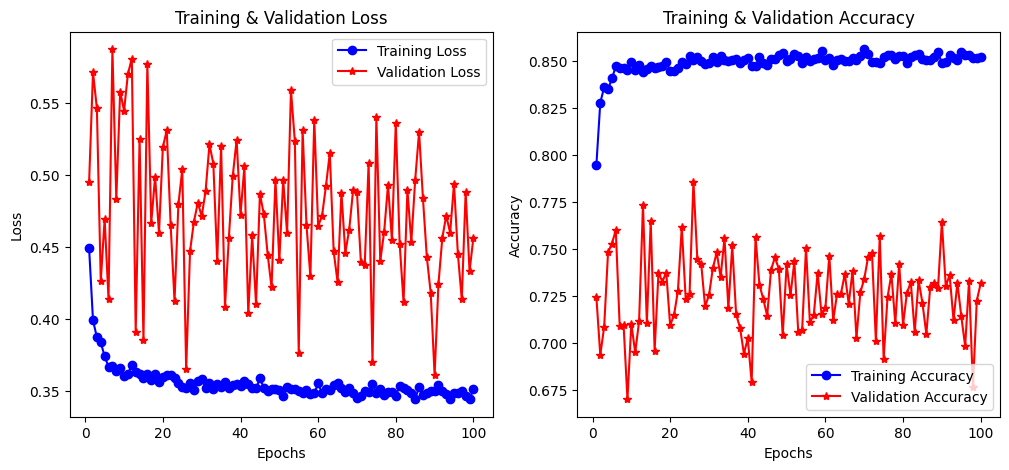

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8662 - loss: 0.3175
Training model: nodes=16, dropout=0.2, lr=0.01, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7511 - loss: 0.5301 - val_accuracy: 0.6551 - val_loss: 0.6275
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8173 - loss: 0.4146 - val_accuracy: 0.7268 - val_loss: 0.4812
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.3781 - val_accuracy: 0.6763 - val_loss: 0.5800
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3669 - val_accuracy: 0.7097 - val_loss: 0.5164
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8434 - loss: 0.3690 - val_accuracy: 0.6992 - val_loss: 0.5149
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8336 - loss: 0.3779 - val_accuracy: 0.7423 - val_loss: 0.4738
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.3632 

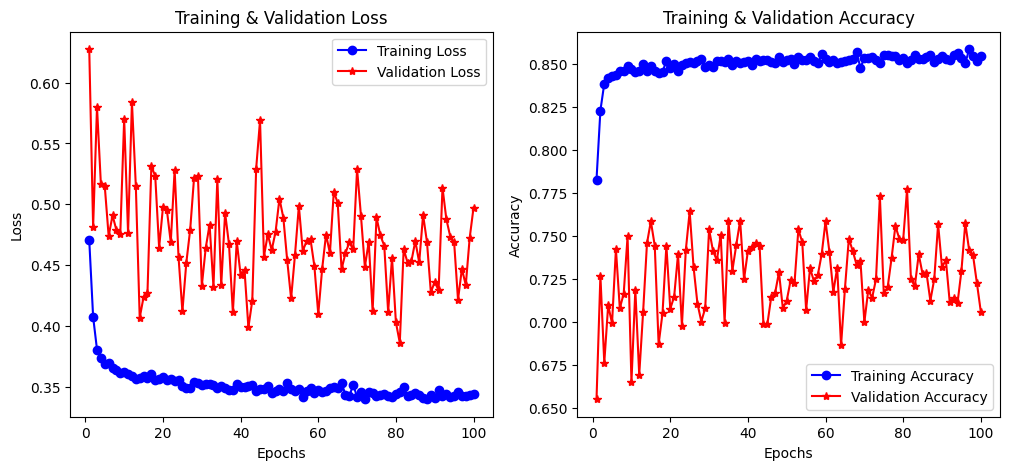

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.8629 - loss: 0.3134
Training model: nodes=16, dropout=0.2, lr=0.01, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7129 - loss: 0.5752 - val_accuracy: 0.6504 - val_loss: 0.6100
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8158 - loss: 0.4249 - val_accuracy: 0.6504 - val_loss: 0.5853
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.3926 - val_accuracy: 0.7066 - val_loss: 0.5252
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.3809 - val_accuracy: 0.6861 - val_loss: 0.5782
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.3751 - val_accuracy: 0.7548 - val_loss: 0.4449
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3699 - val_accuracy: 0.6938 - val_loss: 0.5307
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.3600 - val_accurac

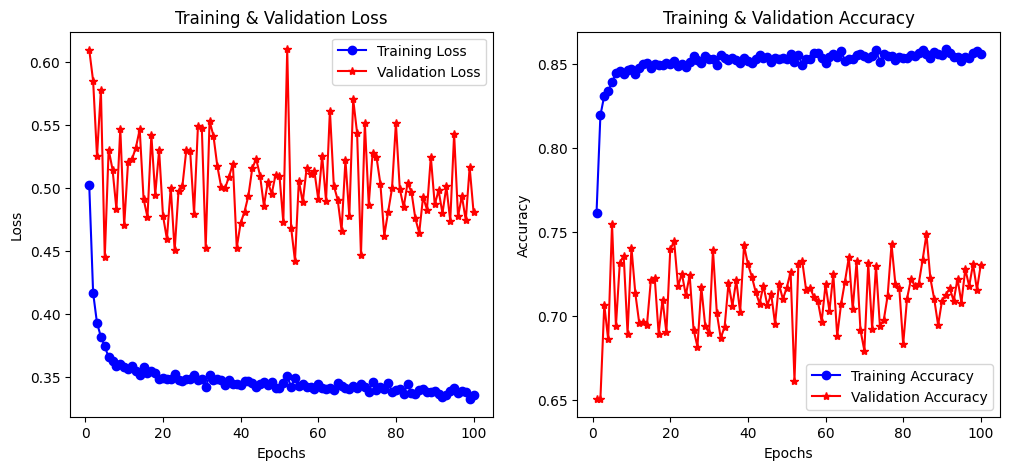

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8650 - loss: 0.3046
Training model: nodes=16, dropout=0.2, lr=0.005, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7371 - loss: 0.5391 - val_accuracy: 0.7248 - val_loss: 0.5093
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8124 - loss: 0.4235 - val_accuracy: 0.7151 - val_loss: 0.5226
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8223 - loss: 0.4096 - val_accuracy: 0.7050 - val_loss: 0.5703
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.3777 - val_accuracy: 0.6999 - val_loss: 0.5023
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.3711 - val_accuracy: 0.7002 - val_loss: 0.5336
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8386 - loss: 0.3744 - val_accuracy: 0.6804 - val_loss: 0.5735
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.3659

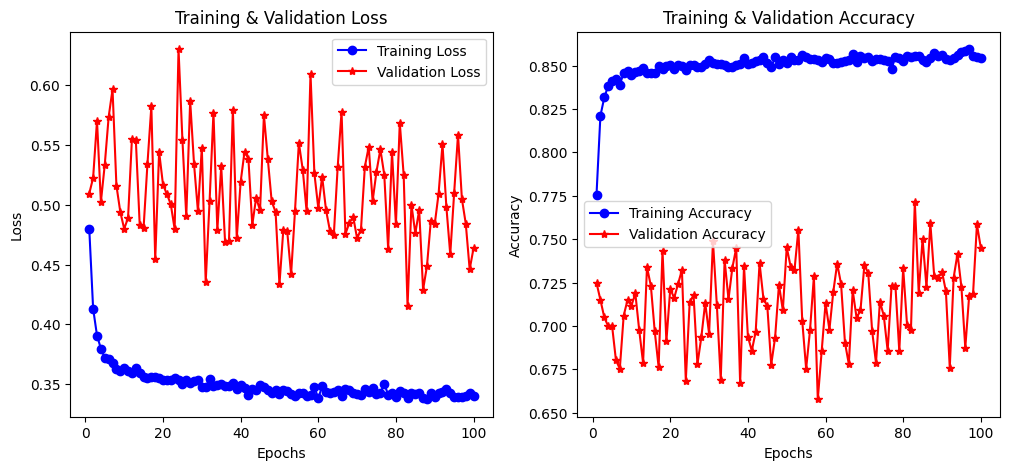

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.3067
Training model: nodes=16, dropout=0.2, lr=0.005, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7218 - loss: 0.5427 - val_accuracy: 0.6679 - val_loss: 0.5671
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8209 - loss: 0.4116 - val_accuracy: 0.6622 - val_loss: 0.6317
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8336 - loss: 0.4028 - val_accuracy: 0.7087 - val_loss: 0.5260
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.3885 - val_accuracy: 0.7083 - val_loss: 0.5368
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8437 - loss: 0.3849 - val_accuracy: 0.6908 - val_loss: 0.5293
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.3776 - val_accuracy: 0.7053 - val_loss: 0.5143
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.3707 -

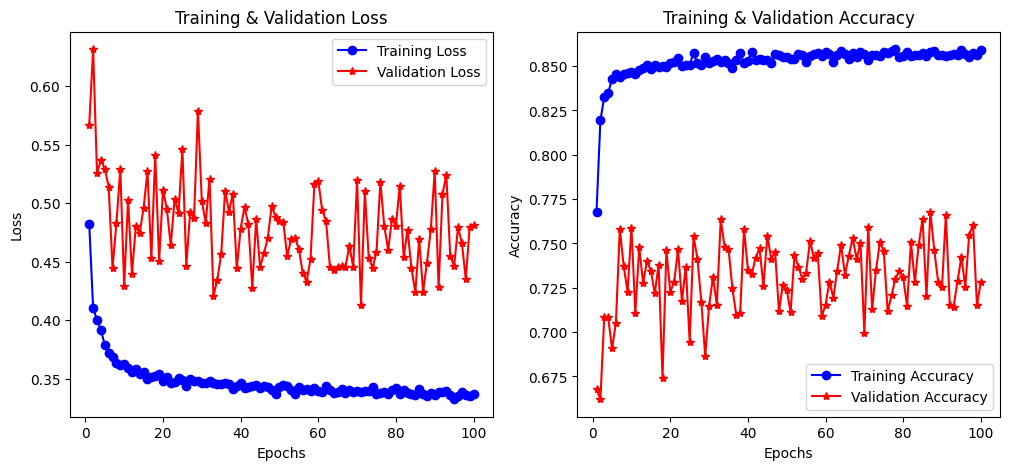

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.3169
Training model: nodes=16, dropout=0.2, lr=0.005, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6405 - loss: 0.6135 - val_accuracy: 0.6383 - val_loss: 0.5888
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4407 - val_accuracy: 0.6554 - val_loss: 0.6071
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 0.4265 - val_accuracy: 0.6965 - val_loss: 0.5723
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8212 - loss: 0.4093 - val_accuracy: 0.7201 - val_loss: 0.5373
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.3921 - val_accuracy: 0.6992 - val_loss: 0.5888
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.3854 - val_accuracy: 0.6982 - val_loss: 0.5405
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3784 - val_accuracy

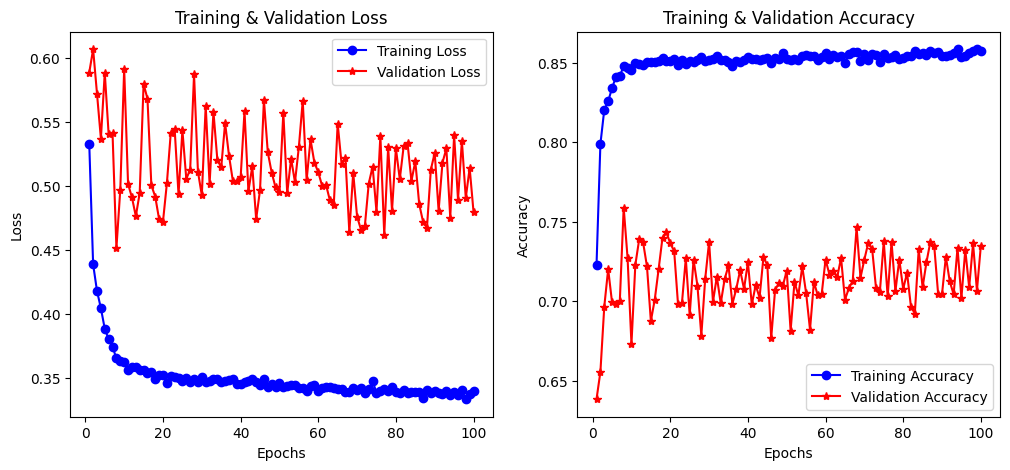

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8675 - loss: 0.3111
Training model: nodes=16, dropout=0.2, lr=0.001, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6531 - loss: 0.6124 - val_accuracy: 0.5995 - val_loss: 0.6453
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7865 - loss: 0.4633 - val_accuracy: 0.6595 - val_loss: 0.5932
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8047 - loss: 0.4320 - val_accuracy: 0.6544 - val_loss: 0.6089
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8102 - loss: 0.4308 - val_accuracy: 0.6639 - val_loss: 0.5926
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8149 - loss: 0.4185 - val_accuracy: 0.6696 - val_loss: 0.5953
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.4013 - val_accuracy: 0.6858 - val_loss: 0.5758
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.3962 -

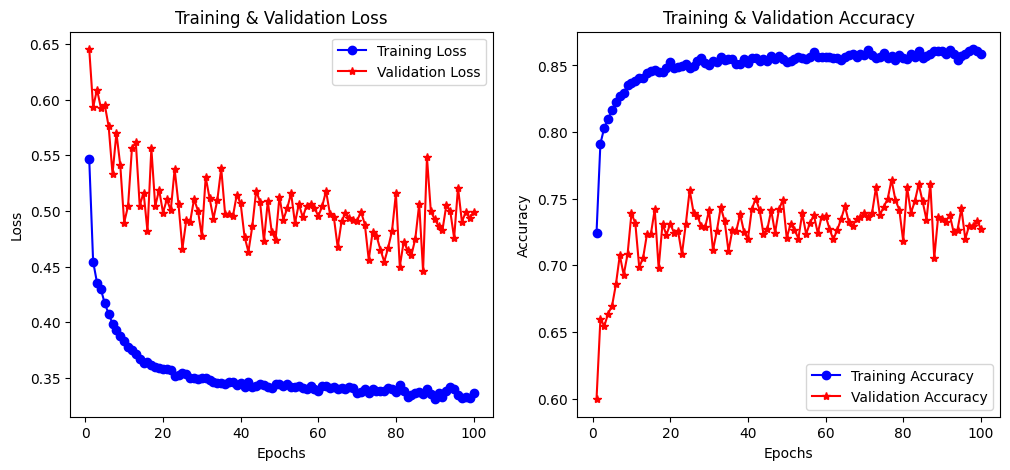

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8707 - loss: 0.3057
Training model: nodes=16, dropout=0.2, lr=0.001, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6321 - loss: 0.6525 - val_accuracy: 0.5325 - val_loss: 0.7019
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.5120 - val_accuracy: 0.5591 - val_loss: 0.7231
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7769 - loss: 0.4671 - val_accuracy: 0.5861 - val_loss: 0.6599
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7865 - loss: 0.4512 - val_accuracy: 0.5928 - val_loss: 0.6632
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8015 - loss: 0.4393 - val_accuracy: 0.5989 - val_loss: 0.6479
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.4232 - val_accuracy: 0.6342 - val_loss: 0.6004
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4237

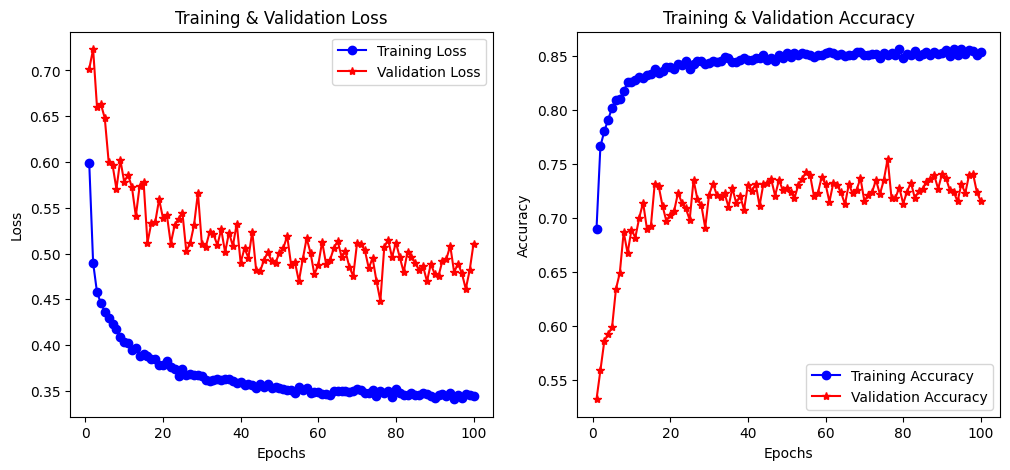

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3113  
Training model: nodes=16, dropout=0.2, lr=0.001, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5792 - loss: 0.6756 - val_accuracy: 0.4887 - val_loss: 0.7059
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.5277 - val_accuracy: 0.5803 - val_loss: 0.6796
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.4799 - val_accuracy: 0.6056 - val_loss: 0.6666
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.4750 - val_accuracy: 0.5978 - val_loss: 0.6863
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4455 - val_accuracy: 0.6329 - val_loss: 0.6368
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4395 - val_accuracy: 0.6511 - val_loss: 0.6006
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4358 - val_accura

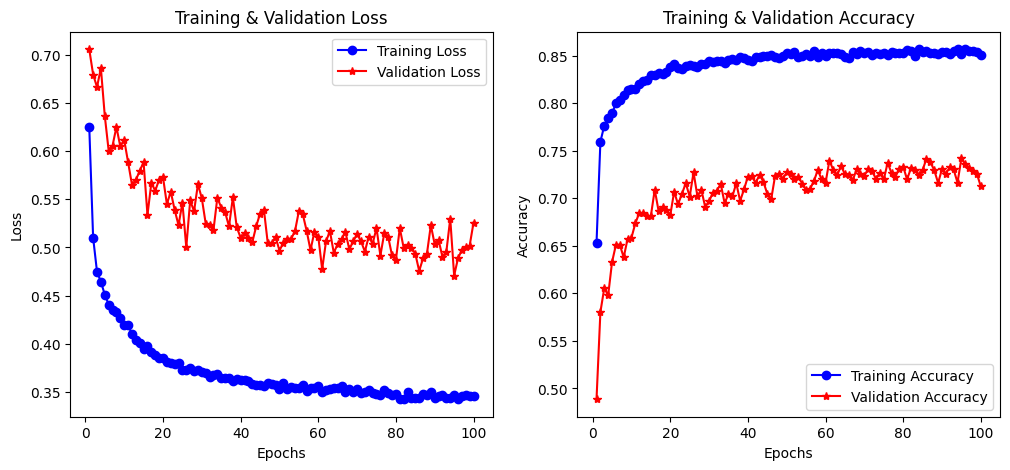

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - loss: 0.3163
Training model: nodes=32, dropout=0, lr=0.01, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4317 - val_accuracy: 0.6928 - val_loss: 0.4975
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8465 - loss: 0.3573 - val_accuracy: 0.6019 - val_loss: 0.7382
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3408 - val_accuracy: 0.8040 - val_loss: 0.4269
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 0.3407 - val_accuracy: 0.7420 - val_loss: 0.4389
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3266 - val_accuracy: 0.7070 - val_loss: 0.5500
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3310 - val_accuracy: 0.7740 - val_loss: 0.4738
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8639 - loss: 0.3240 - va

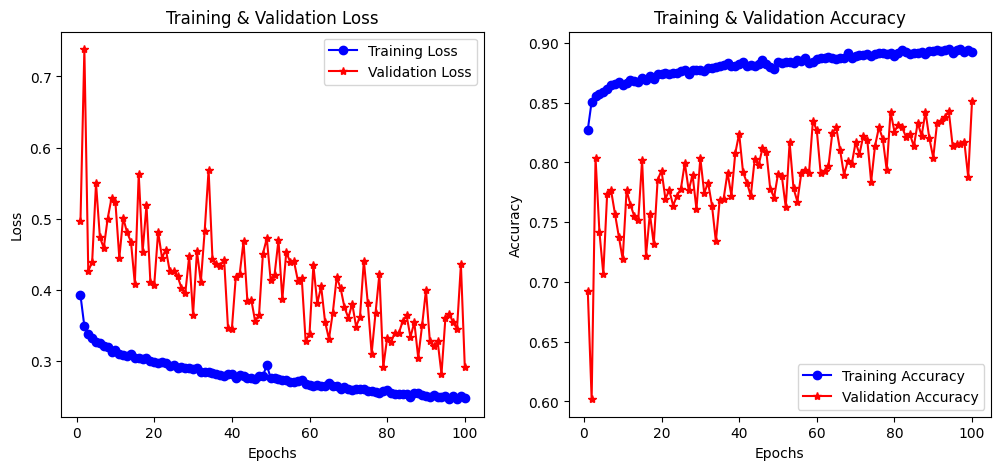

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8620 - loss: 0.3626
Training model: nodes=32, dropout=0, lr=0.01, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7657 - loss: 0.4630 - val_accuracy: 0.6494 - val_loss: 0.6108
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3491 - val_accuracy: 0.7454 - val_loss: 0.5216
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3305 - val_accuracy: 0.7255 - val_loss: 0.5217
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8600 - loss: 0.3274 - val_accuracy: 0.7602 - val_loss: 0.4432
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8586 - loss: 0.3259 - val_accuracy: 0.6773 - val_loss: 0.6235
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.3225 - val_accuracy: 0.7511 - val_loss: 0.4954
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3211 - 

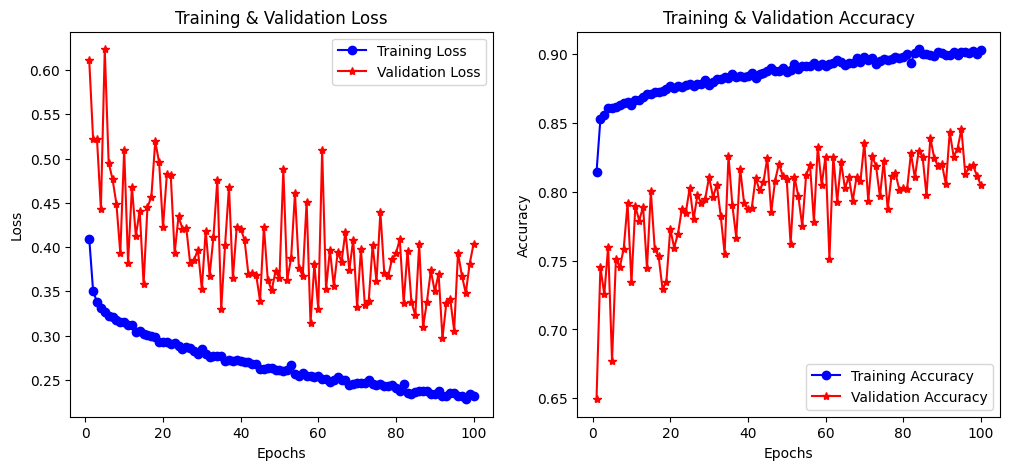

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.3398
Training model: nodes=32, dropout=0, lr=0.01, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7837 - loss: 0.4657 - val_accuracy: 0.6787 - val_loss: 0.5768
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3524 - val_accuracy: 0.7289 - val_loss: 0.5201
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3420 - val_accuracy: 0.6814 - val_loss: 0.5822
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3408 - val_accuracy: 0.6979 - val_loss: 0.5897
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3194 - val_accuracy: 0.7568 - val_loss: 0.4547
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3248 - val_accuracy: 0.7902 - val_loss: 0.3982
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3193 - val_accuracy: 0

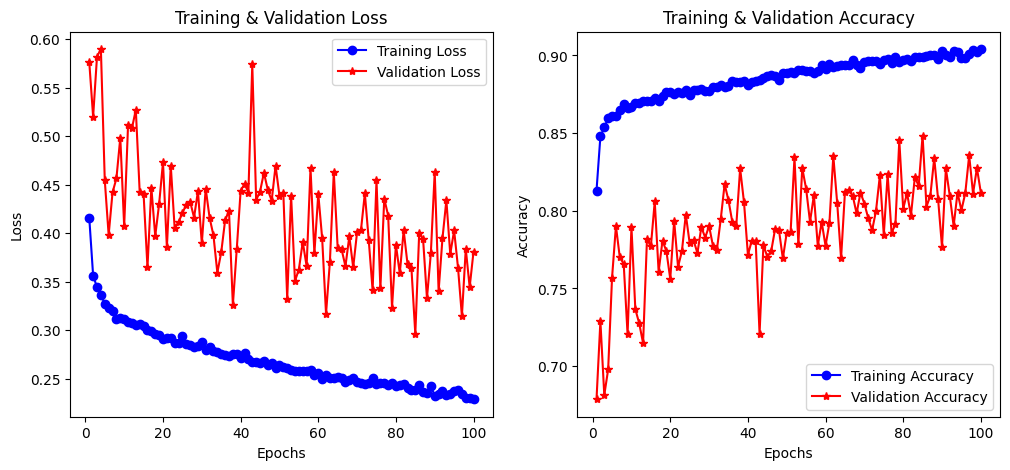

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3624
Training model: nodes=32, dropout=0, lr=0.005, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4481 - val_accuracy: 0.7942 - val_loss: 0.4110
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8483 - loss: 0.3608 - val_accuracy: 0.7497 - val_loss: 0.4634
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3348 - val_accuracy: 0.7215 - val_loss: 0.5280
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8642 - loss: 0.3218 - val_accuracy: 0.7642 - val_loss: 0.4949
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8570 - loss: 0.3280 - val_accuracy: 0.7194 - val_loss: 0.5515
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8593 - loss: 0.3267 - val_accuracy: 0.7545 - val_loss: 0.5106
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8641 - loss: 0.3150 - v

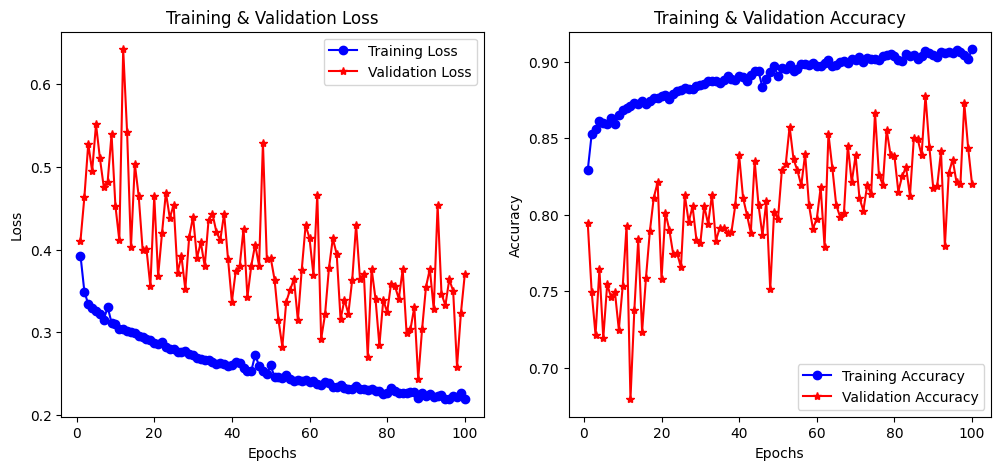

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8738 - loss: 0.3695
Training model: nodes=32, dropout=0, lr=0.005, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7630 - loss: 0.4848 - val_accuracy: 0.7073 - val_loss: 0.5446
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.3723 - val_accuracy: 0.7437 - val_loss: 0.4839
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3365 - val_accuracy: 0.7767 - val_loss: 0.4246
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8596 - loss: 0.3357 - val_accuracy: 0.7430 - val_loss: 0.4695
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8588 - loss: 0.3234 - val_accuracy: 0.7612 - val_loss: 0.4644
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3168 - val_accuracy: 0.7167 - val_loss: 0.5315
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8663 - loss: 0.3172 - v

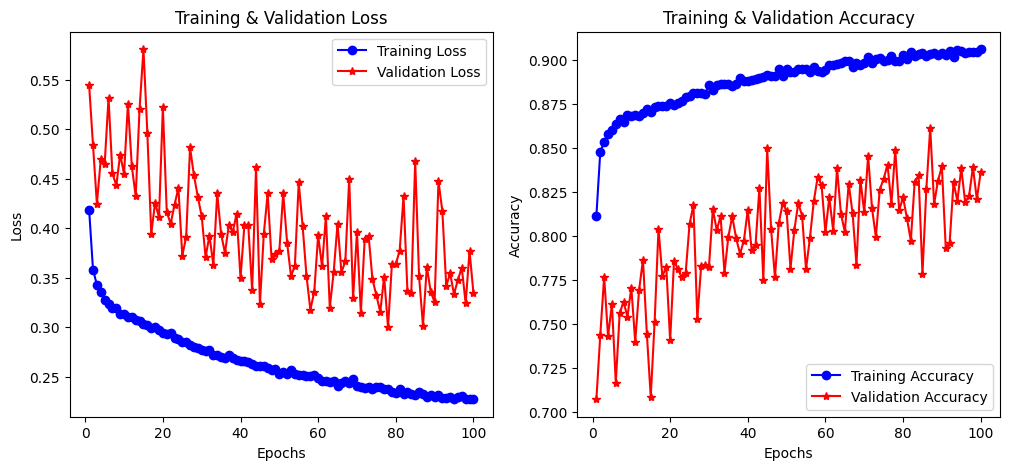

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3397
Training model: nodes=32, dropout=0, lr=0.005, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7354 - loss: 0.5121 - val_accuracy: 0.7437 - val_loss: 0.5109
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3610 - val_accuracy: 0.6810 - val_loss: 0.6054
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.3499 - val_accuracy: 0.7161 - val_loss: 0.5536
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3335 - val_accuracy: 0.7282 - val_loss: 0.5213
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3356 - val_accuracy: 0.7157 - val_loss: 0.5389
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3264 - val_accuracy: 0.7238 - val_loss: 0.5321
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3253 - val_accuracy: 

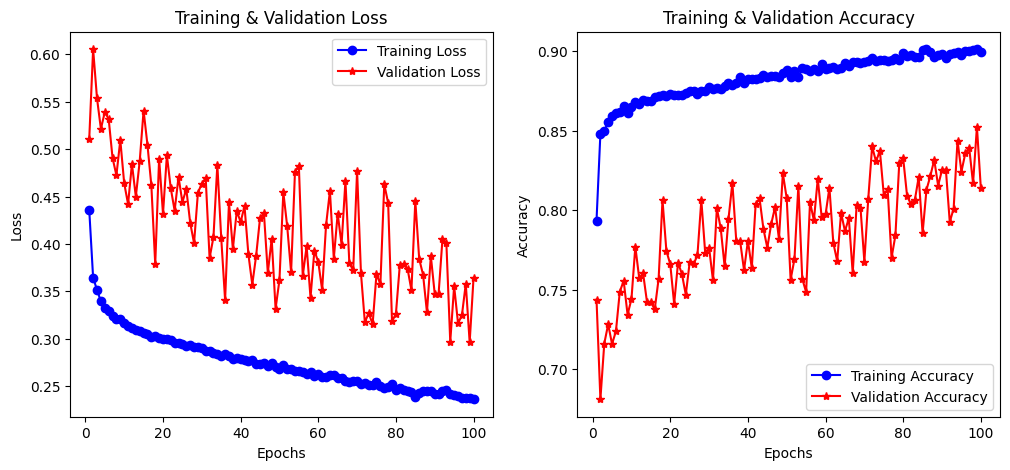

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3164
Training model: nodes=32, dropout=0, lr=0.001, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7375 - loss: 0.5574 - val_accuracy: 0.6689 - val_loss: 0.5758
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8299 - loss: 0.3859 - val_accuracy: 0.6888 - val_loss: 0.5881
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8493 - loss: 0.3653 - val_accuracy: 0.7043 - val_loss: 0.5764
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8521 - loss: 0.3606 - val_accuracy: 0.6965 - val_loss: 0.5827
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8452 - loss: 0.3561 - val_accuracy: 0.7454 - val_loss: 0.4983
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8522 - loss: 0.3432 - val_accuracy: 0.7009 - val_loss: 0.5755
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8610 - loss: 0.3342 - v

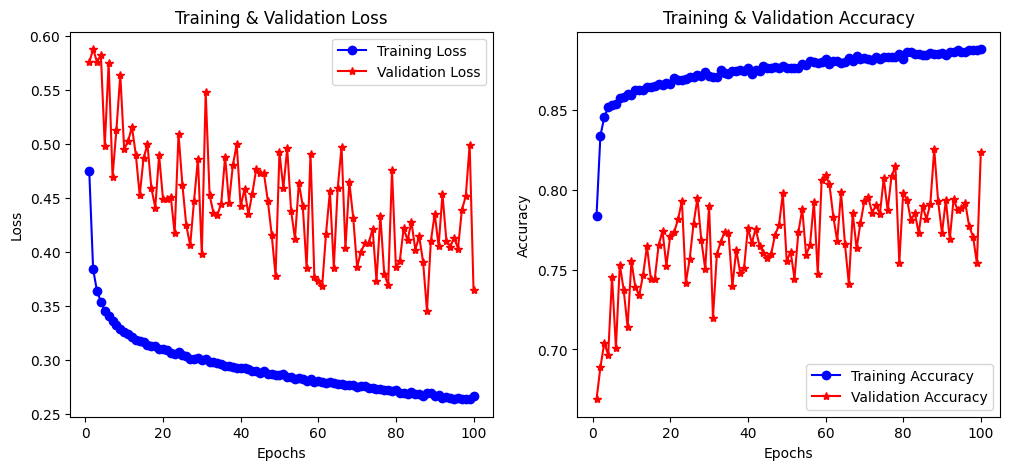

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8578 - loss: 0.3188
Training model: nodes=32, dropout=0, lr=0.001, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6923 - loss: 0.5776 - val_accuracy: 0.6248 - val_loss: 0.6157
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8207 - loss: 0.4057 - val_accuracy: 0.6858 - val_loss: 0.5810
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.3782 - val_accuracy: 0.7097 - val_loss: 0.5448
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8423 - loss: 0.3672 - val_accuracy: 0.7390 - val_loss: 0.5203
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8473 - loss: 0.3646 - val_accuracy: 0.7312 - val_loss: 0.5530
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.3509 - val_accuracy: 0.7353 - val_loss: 0.5390
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3451 -

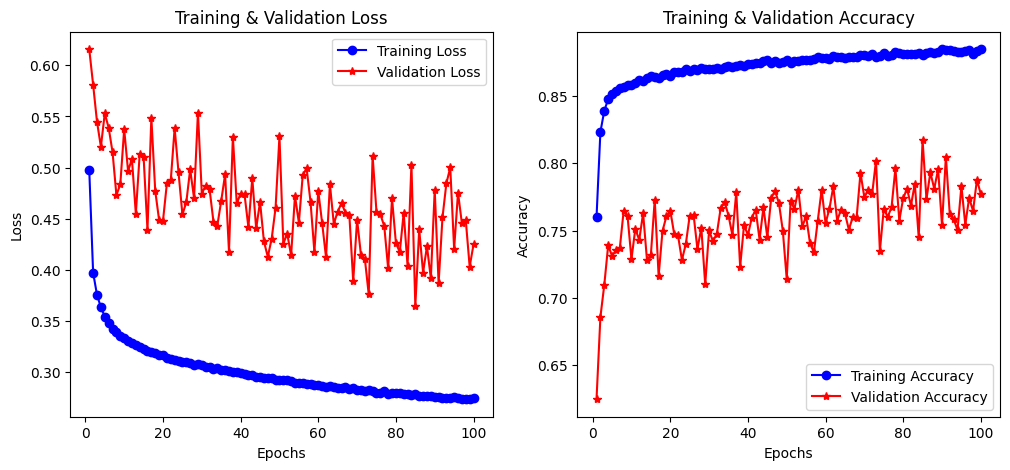

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8672 - loss: 0.3097
Training model: nodes=32, dropout=0, lr=0.001, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6877 - loss: 0.6040 - val_accuracy: 0.6069 - val_loss: 0.6356
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4247 - val_accuracy: 0.6662 - val_loss: 0.5714
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.3911 - val_accuracy: 0.6810 - val_loss: 0.5615
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.3763 - val_accuracy: 0.7231 - val_loss: 0.5226
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.3562 - val_accuracy: 0.7309 - val_loss: 0.5074
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.3560 - val_accuracy: 0.7383 - val_loss: 0.5169
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.3553 - val_accuracy: 

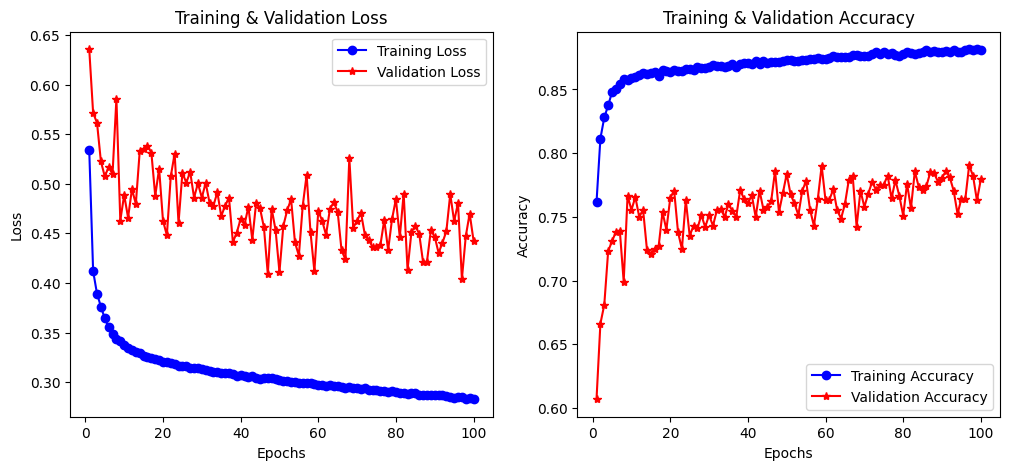

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.3052
Training model: nodes=32, dropout=0.2, lr=0.01, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7810 - loss: 0.4703 - val_accuracy: 0.6632 - val_loss: 0.5308
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.3794 - val_accuracy: 0.6571 - val_loss: 0.6284
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8378 - loss: 0.3717 - val_accuracy: 0.6851 - val_loss: 0.5383
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8499 - loss: 0.3490 - val_accuracy: 0.6571 - val_loss: 0.5779
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8436 - loss: 0.3631 - val_accuracy: 0.6955 - val_loss: 0.5049
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8519 - loss: 0.3529 - val_accuracy: 0.7285 - val_loss: 0.4572
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8534 - loss: 0.3459 - 

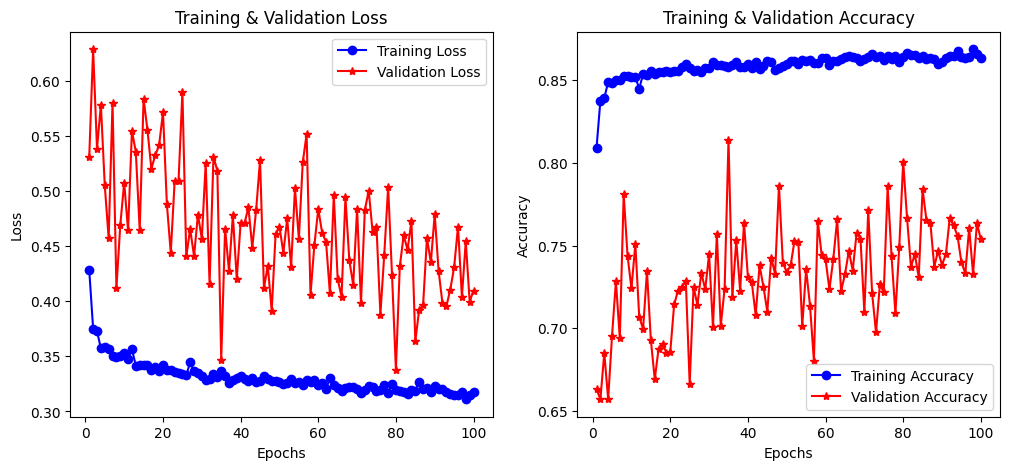

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8651 - loss: 0.3065  
Training model: nodes=32, dropout=0.2, lr=0.01, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7612 - loss: 0.4945 - val_accuracy: 0.6841 - val_loss: 0.5309
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.3771 - val_accuracy: 0.7275 - val_loss: 0.4785
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8463 - loss: 0.3624 - val_accuracy: 0.6733 - val_loss: 0.5966
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8470 - loss: 0.3542 - val_accuracy: 0.7265 - val_loss: 0.5155
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8497 - loss: 0.3558 - val_accuracy: 0.7285 - val_loss: 0.4778
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8497 - loss: 0.3487 - val_accuracy: 0.6837 - val_loss: 0.5610
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8526 - loss: 0.3436 

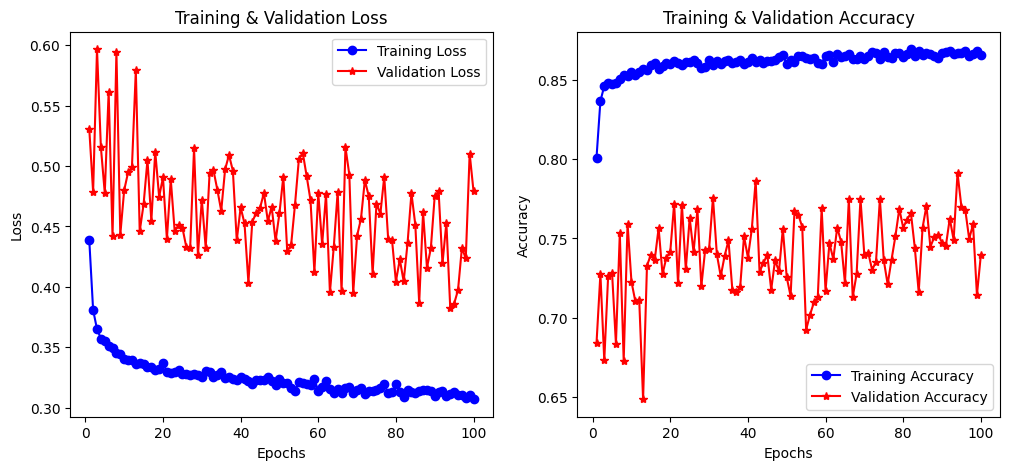

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8744 - loss: 0.2949
Training model: nodes=32, dropout=0.2, lr=0.01, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7442 - loss: 0.5059 - val_accuracy: 0.7326 - val_loss: 0.5167
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.4015 - val_accuracy: 0.6881 - val_loss: 0.6516
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3648 - val_accuracy: 0.7140 - val_loss: 0.5067
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.3573 - val_accuracy: 0.7703 - val_loss: 0.4107
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3543 - val_accuracy: 0.7316 - val_loss: 0.4787
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8551 - loss: 0.3466 - val_accuracy: 0.7578 - val_loss: 0.4406
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3537 - val_accurac

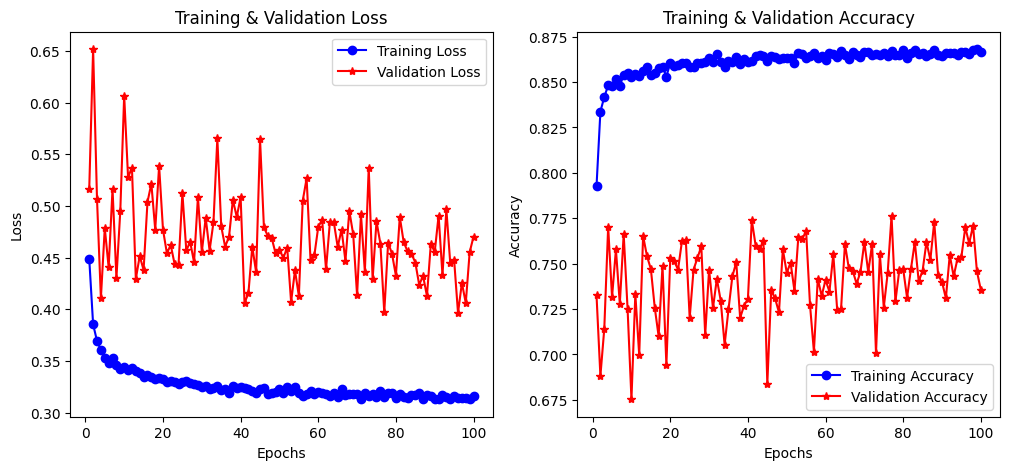

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3059
Training model: nodes=32, dropout=0.2, lr=0.005, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7763 - loss: 0.4801 - val_accuracy: 0.6888 - val_loss: 0.6226
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8306 - loss: 0.3933 - val_accuracy: 0.7464 - val_loss: 0.4701
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8405 - loss: 0.3718 - val_accuracy: 0.7208 - val_loss: 0.5046
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8513 - loss: 0.3484 - val_accuracy: 0.7279 - val_loss: 0.4860
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.3538 - val_accuracy: 0.7295 - val_loss: 0.4963
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8457 - loss: 0.3558 - val_accuracy: 0.7312 - val_loss: 0.4728
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.3410 -

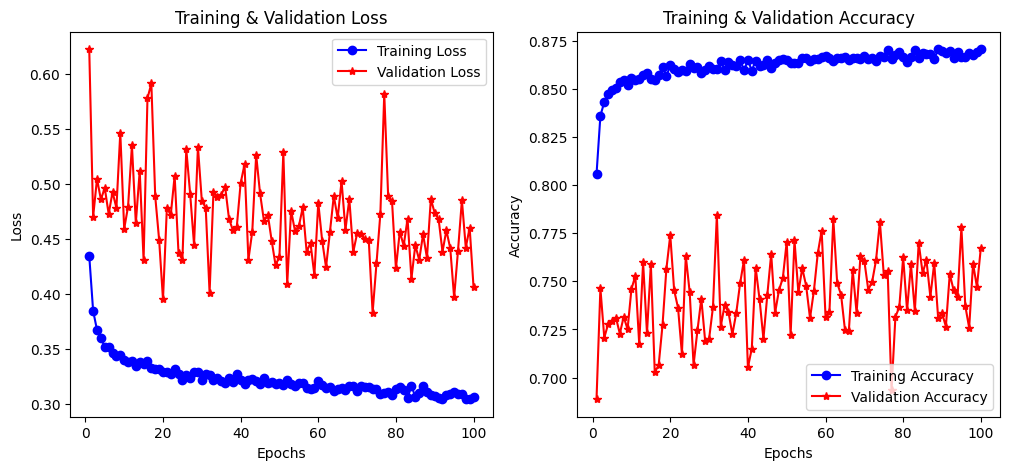

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.2990  
Training model: nodes=32, dropout=0.2, lr=0.005, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.5287 - val_accuracy: 0.7093 - val_loss: 0.5367
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8244 - loss: 0.4052 - val_accuracy: 0.7679 - val_loss: 0.4494
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.3777 - val_accuracy: 0.6831 - val_loss: 0.5696
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3717 - val_accuracy: 0.7215 - val_loss: 0.4998
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8483 - loss: 0.3505 - val_accuracy: 0.6800 - val_loss: 0.5551
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8454 - loss: 0.3572 - val_accuracy: 0.7524 - val_loss: 0.4563
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8494 - loss: 0.3512

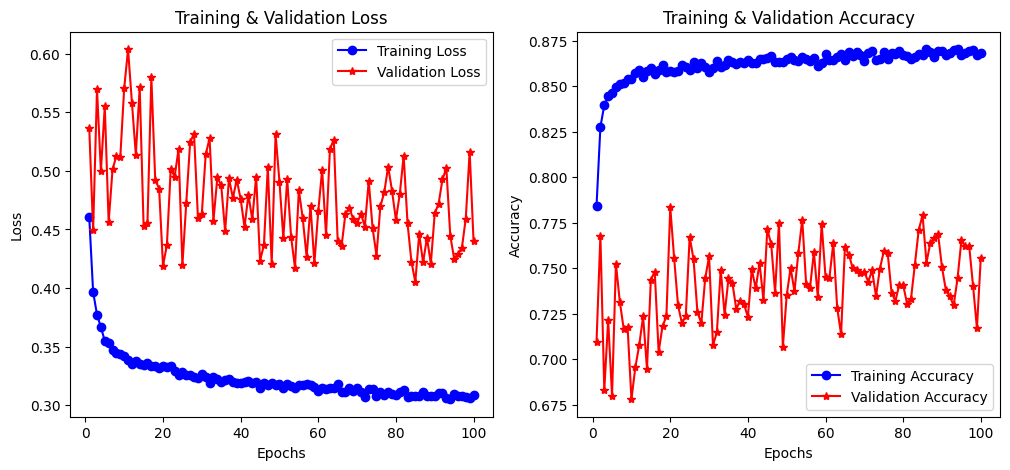

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8766 - loss: 0.2960
Training model: nodes=32, dropout=0.2, lr=0.005, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6787 - loss: 0.5765 - val_accuracy: 0.6437 - val_loss: 0.6030
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8155 - loss: 0.4194 - val_accuracy: 0.6982 - val_loss: 0.5866
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.3925 - val_accuracy: 0.7319 - val_loss: 0.5302
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.3801 - val_accuracy: 0.6901 - val_loss: 0.5797
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8362 - loss: 0.3757 - val_accuracy: 0.6922 - val_loss: 0.5721
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3508 - val_accuracy: 0.7134 - val_loss: 0.5469
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 0.3489 - val_accura

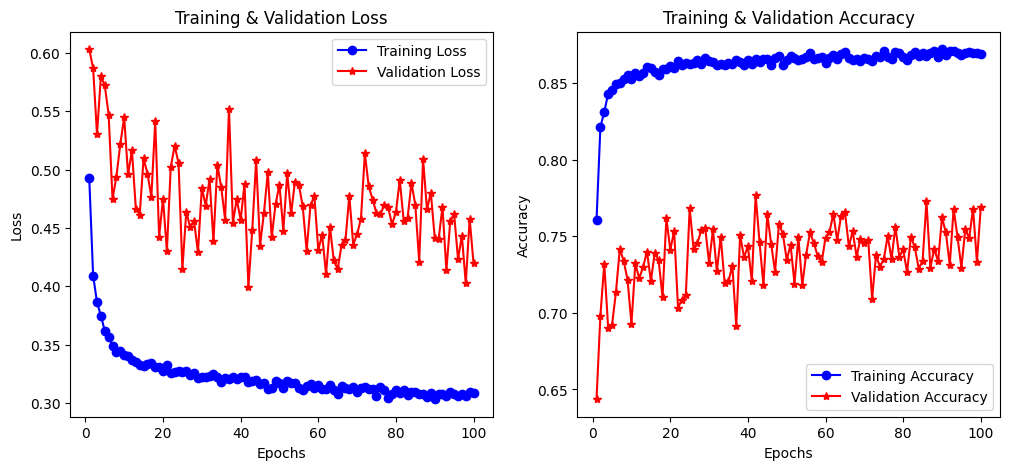

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8728 - loss: 0.2940
Training model: nodes=32, dropout=0.2, lr=0.001, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7123 - loss: 0.5727 - val_accuracy: 0.6157 - val_loss: 0.6665
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8035 - loss: 0.4336 - val_accuracy: 0.6605 - val_loss: 0.6175
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.4136 - val_accuracy: 0.7151 - val_loss: 0.5340
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.3970 - val_accuracy: 0.6861 - val_loss: 0.5943
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8290 - loss: 0.3965 - val_accuracy: 0.6979 - val_loss: 0.5572
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.3709 - val_accuracy: 0.6881 - val_loss: 0.5602
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 0.3815

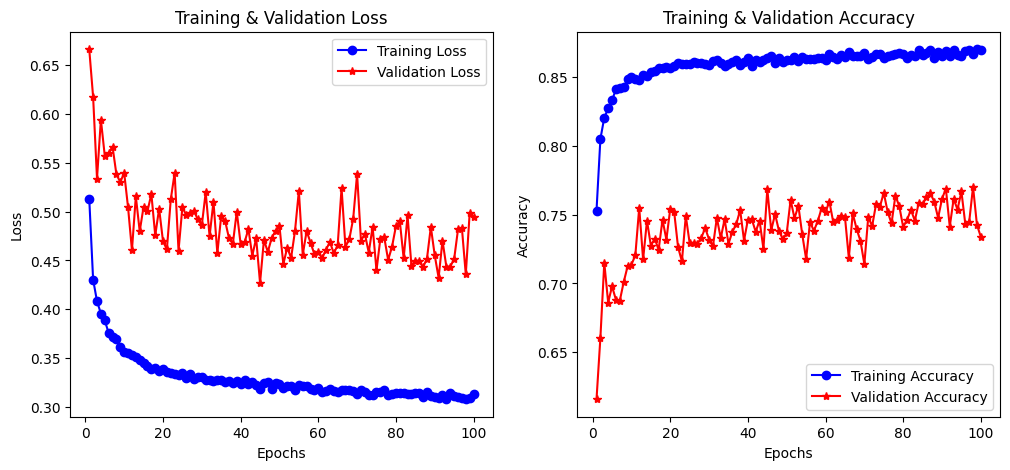

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8695 - loss: 0.3007
Training model: nodes=32, dropout=0.2, lr=0.001, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6601 - loss: 0.6218 - val_accuracy: 0.6309 - val_loss: 0.6494
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7894 - loss: 0.4485 - val_accuracy: 0.6463 - val_loss: 0.6111
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4372 - val_accuracy: 0.6524 - val_loss: 0.5960
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8178 - loss: 0.4139 - val_accuracy: 0.6794 - val_loss: 0.5879
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8196 - loss: 0.4094 - val_accuracy: 0.7050 - val_loss: 0.5626
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8307 - loss: 0.3916 - val_accuracy: 0.7154 - val_loss: 0.5364
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.3870

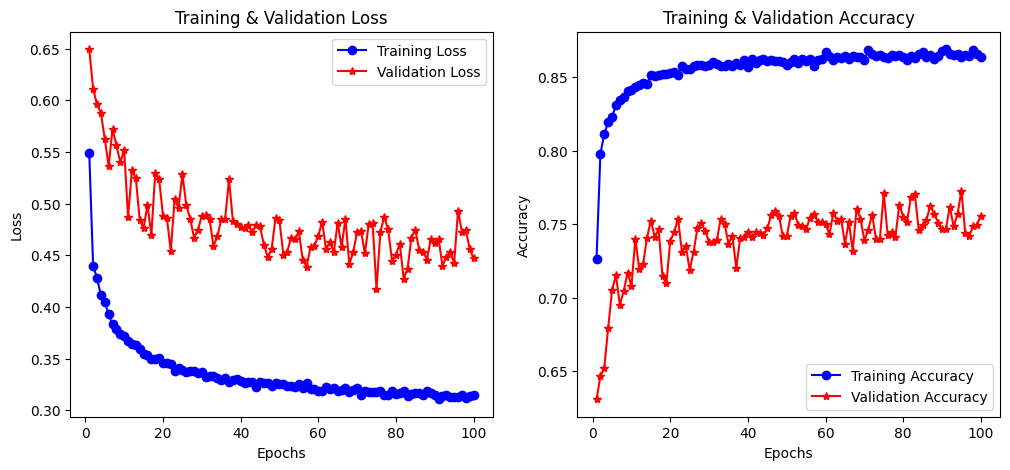

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8740 - loss: 0.2982
Training model: nodes=32, dropout=0.2, lr=0.001, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6668 - loss: 0.6298 - val_accuracy: 0.6012 - val_loss: 0.6394
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7937 - loss: 0.4518 - val_accuracy: 0.6595 - val_loss: 0.5898
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8072 - loss: 0.4207 - val_accuracy: 0.6517 - val_loss: 0.6146
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8212 - loss: 0.4070 - val_accuracy: 0.6800 - val_loss: 0.5774
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.4143 - val_accuracy: 0.6874 - val_loss: 0.5741
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8271 - loss: 0.4014 - val_accuracy: 0.6965 - val_loss: 0.5575
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8267 - loss: 0.3966 - val_accura

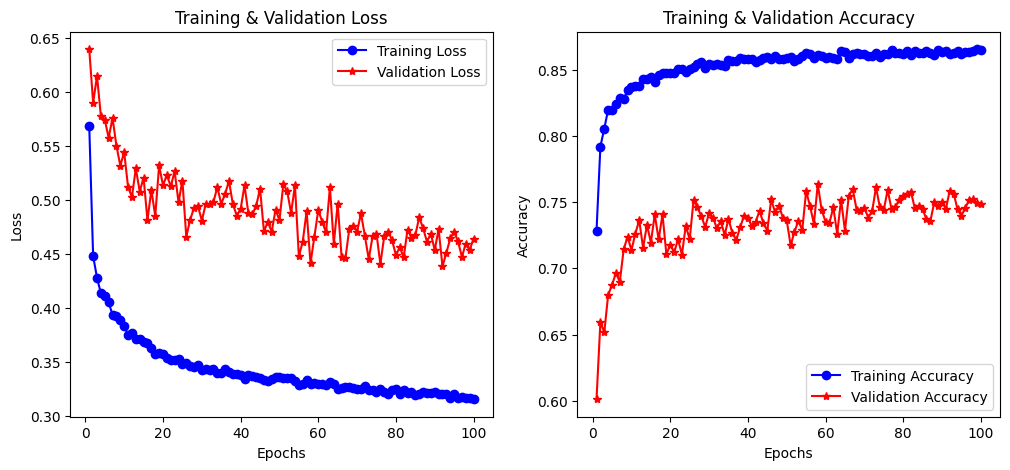

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8674 - loss: 0.3041
Training model: nodes=64, dropout=0, lr=0.01, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8024 - loss: 0.4300 - val_accuracy: 0.7413 - val_loss: 0.4968
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8528 - loss: 0.3473 - val_accuracy: 0.7528 - val_loss: 0.4674
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8507 - loss: 0.3496 - val_accuracy: 0.6834 - val_loss: 0.5947
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8470 - loss: 0.3534 - val_accuracy: 0.7309 - val_loss: 0.5138
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8628 - loss: 0.3236 - val_accuracy: 0.7279 - val_loss: 0.5542
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8644 - loss: 0.3199 - val_accuracy: 0.6908 - val_loss: 0.6011
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.8644 - los

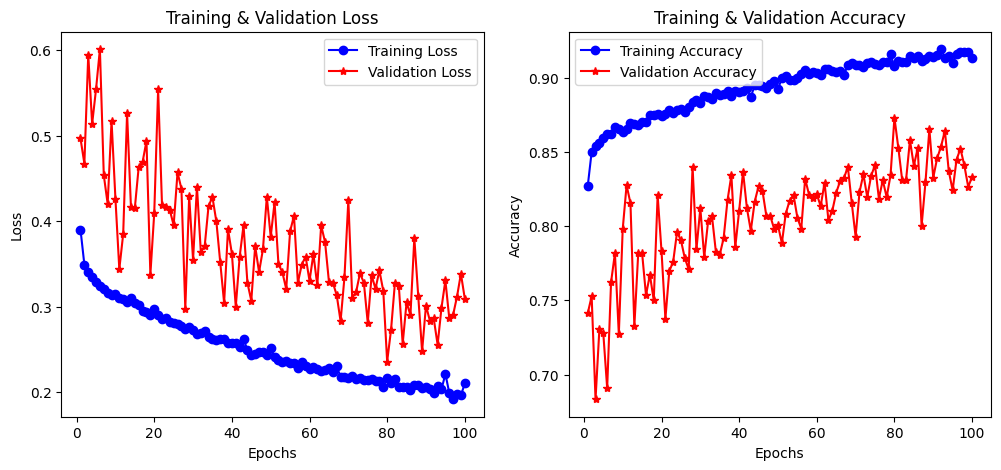

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8565 - loss: 0.4603
Training model: nodes=64, dropout=0, lr=0.01, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8165 - loss: 0.4183 - val_accuracy: 0.7447 - val_loss: 0.4867
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.3428 - val_accuracy: 0.7063 - val_loss: 0.5296
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8579 - loss: 0.3363 - val_accuracy: 0.7012 - val_loss: 0.6240
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8573 - loss: 0.3248 - val_accuracy: 0.7265 - val_loss: 0.5254
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3182 - val_accuracy: 0.7703 - val_loss: 0.4213
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.3151 - val_accuracy: 0.7713 - val_loss: 0.4336
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.3212 - 

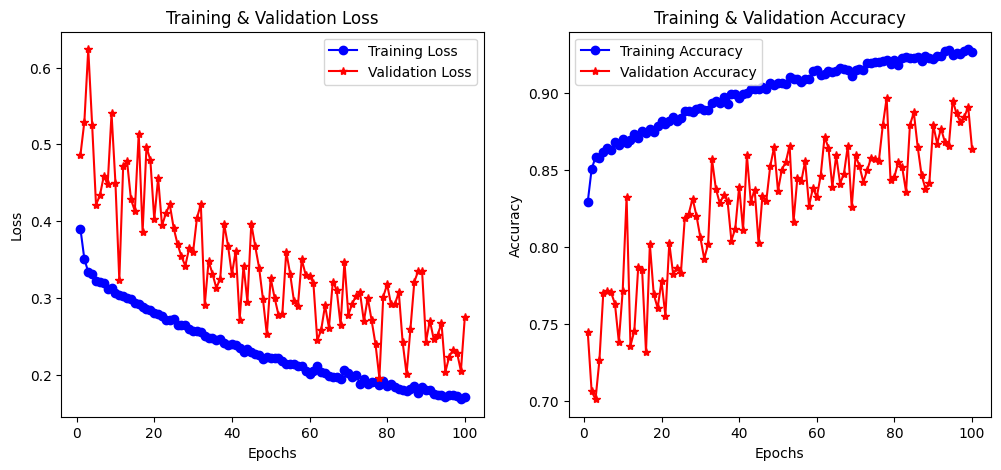

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.8472 - loss: 0.5321
Training model: nodes=64, dropout=0, lr=0.01, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.4358 - val_accuracy: 0.6989 - val_loss: 0.6050
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8513 - loss: 0.3528 - val_accuracy: 0.7572 - val_loss: 0.4821
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8572 - loss: 0.3409 - val_accuracy: 0.7376 - val_loss: 0.5332
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8562 - loss: 0.3372 - val_accuracy: 0.7733 - val_loss: 0.4644
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.3348 - val_accuracy: 0.7114 - val_loss: 0.5570
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.3261 - val_accuracy: 0.8043 - val_loss: 0.3712
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8663 - loss: 0.3104 - val_accuracy:

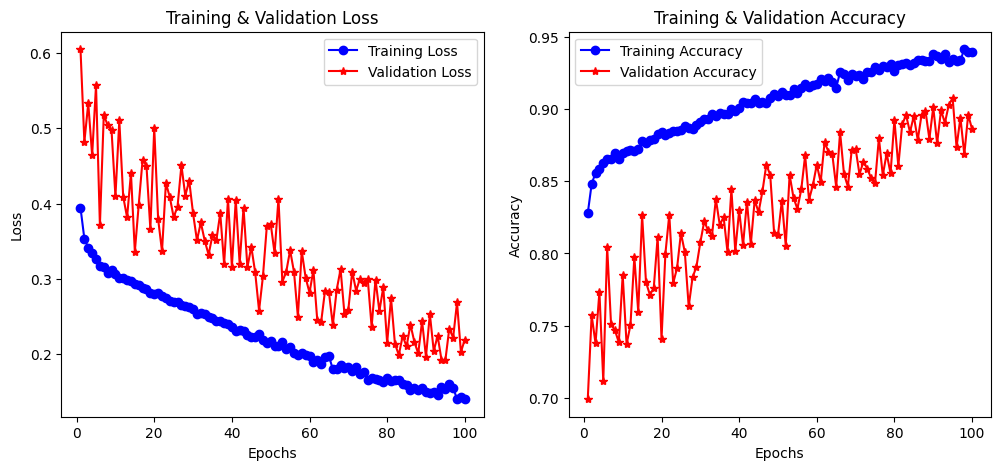

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8556 - loss: 0.5443
Training model: nodes=64, dropout=0, lr=0.005, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8147 - loss: 0.4172 - val_accuracy: 0.6730 - val_loss: 0.6368
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8500 - loss: 0.3495 - val_accuracy: 0.7211 - val_loss: 0.5847
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8547 - loss: 0.3431 - val_accuracy: 0.7359 - val_loss: 0.4770
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8645 - loss: 0.3212 - val_accuracy: 0.7794 - val_loss: 0.4062
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.8624 - loss: 0.3255 - val_accuracy: 0.7356 - val_loss: 0.5169
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.8627 - loss: 0.3152 - val_accuracy: 0.6942 - val_loss: 0.5842
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8692 - lo

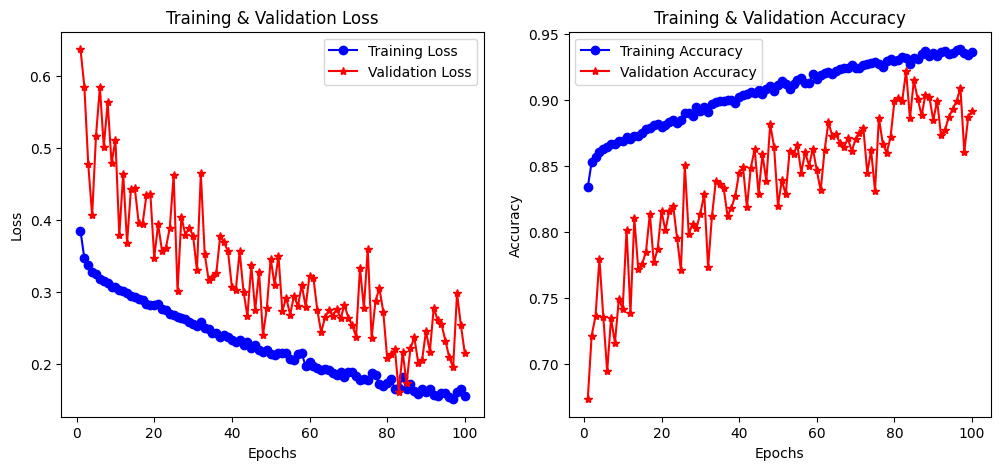

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8604 - loss: 0.5099
Training model: nodes=64, dropout=0, lr=0.005, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.4493 - val_accuracy: 0.7447 - val_loss: 0.4689
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3510 - val_accuracy: 0.7194 - val_loss: 0.5574
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3353 - val_accuracy: 0.7241 - val_loss: 0.5593
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.3323 - val_accuracy: 0.7730 - val_loss: 0.4221
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3251 - val_accuracy: 0.7380 - val_loss: 0.4888
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3303 - val_accuracy: 0.7386 - val_loss: 0.5050
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.3082 -

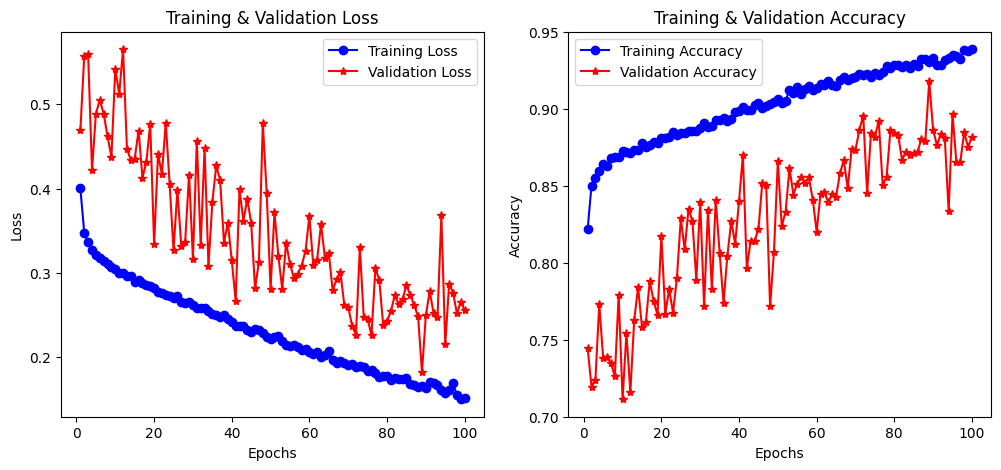

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8558 - loss: 0.5088
Training model: nodes=64, dropout=0, lr=0.005, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7833 - loss: 0.4645 - val_accuracy: 0.7312 - val_loss: 0.5076
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8489 - loss: 0.3539 - val_accuracy: 0.7383 - val_loss: 0.5326
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3393 - val_accuracy: 0.7194 - val_loss: 0.5108
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3320 - val_accuracy: 0.7309 - val_loss: 0.5060
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3234 - val_accuracy: 0.7336 - val_loss: 0.4902
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3171 - val_accuracy: 0.7066 - val_loss: 0.5604
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8621 - loss: 0.3137 - val_accuracy

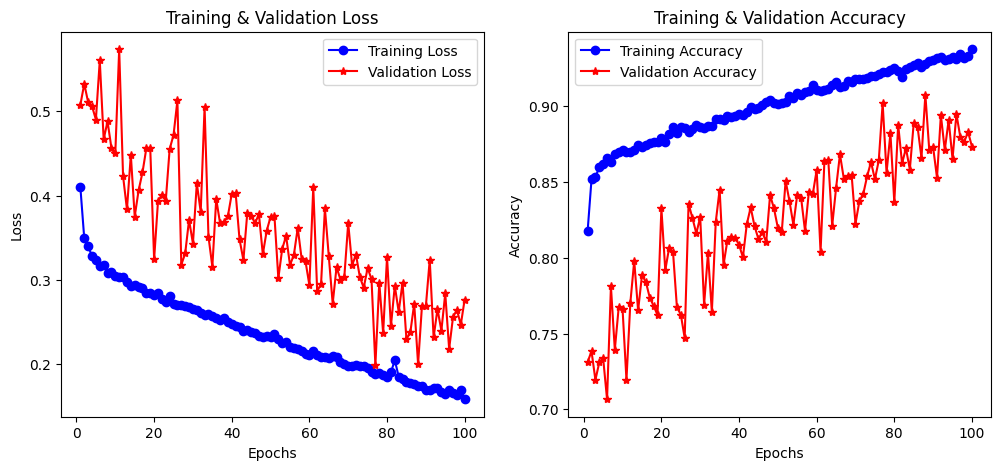

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8688 - loss: 0.4215
Training model: nodes=64, dropout=0, lr=0.001, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7773 - loss: 0.4947 - val_accuracy: 0.6309 - val_loss: 0.6725
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8374 - loss: 0.3733 - val_accuracy: 0.7100 - val_loss: 0.5377
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3536 - val_accuracy: 0.7161 - val_loss: 0.5605
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3410 - val_accuracy: 0.7457 - val_loss: 0.5128
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.3384 - val_accuracy: 0.7683 - val_loss: 0.4674
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8564 - loss: 0.3373 - val_accuracy: 0.7002 - val_loss: 0.5868
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3250

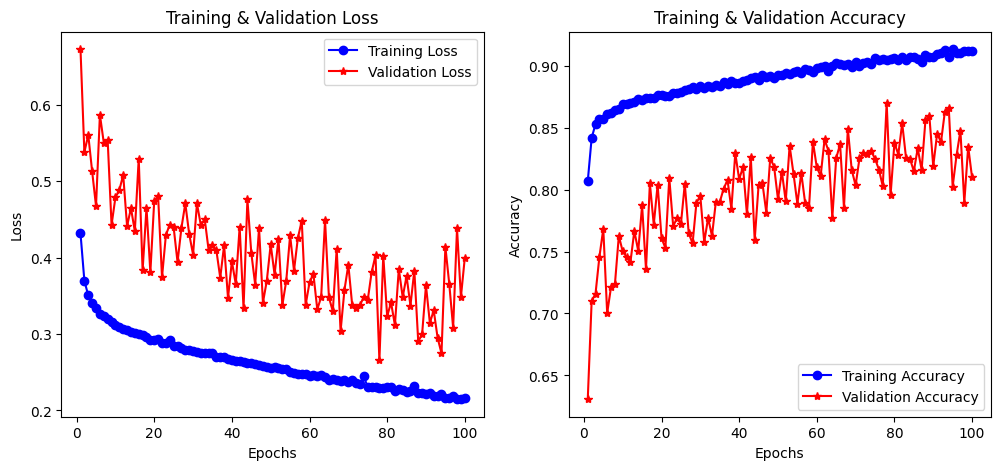

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8716 - loss: 0.3153
Training model: nodes=64, dropout=0, lr=0.001, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7372 - loss: 0.5316 - val_accuracy: 0.6521 - val_loss: 0.5883
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8340 - loss: 0.3810 - val_accuracy: 0.7417 - val_loss: 0.5128
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.3637 - val_accuracy: 0.6787 - val_loss: 0.6251
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3597 - val_accuracy: 0.7181 - val_loss: 0.5565
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.3499 - val_accuracy: 0.7457 - val_loss: 0.5295
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3342 - val_accuracy: 0.7669 - val_loss: 0.4727
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8586 - loss: 0.3312 -

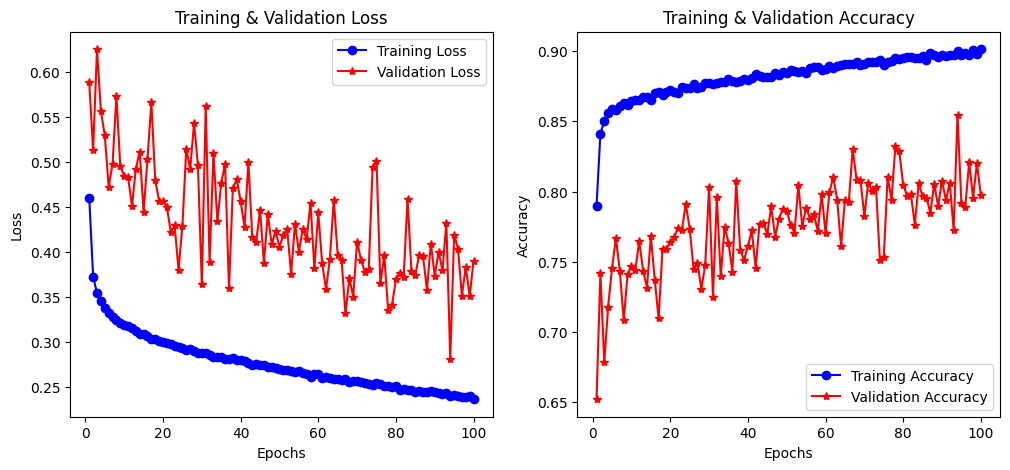

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8698 - loss: 0.3184
Training model: nodes=64, dropout=0, lr=0.001, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6962 - loss: 0.5925 - val_accuracy: 0.6221 - val_loss: 0.6216
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8134 - loss: 0.4075 - val_accuracy: 0.6726 - val_loss: 0.5778
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8382 - loss: 0.3760 - val_accuracy: 0.7063 - val_loss: 0.5461
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8488 - loss: 0.3587 - val_accuracy: 0.7262 - val_loss: 0.5320
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8536 - loss: 0.3459 - val_accuracy: 0.7531 - val_loss: 0.4828
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3355 - val_accuracy: 0.7390 - val_loss: 0.5117
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3321 - val_accuracy

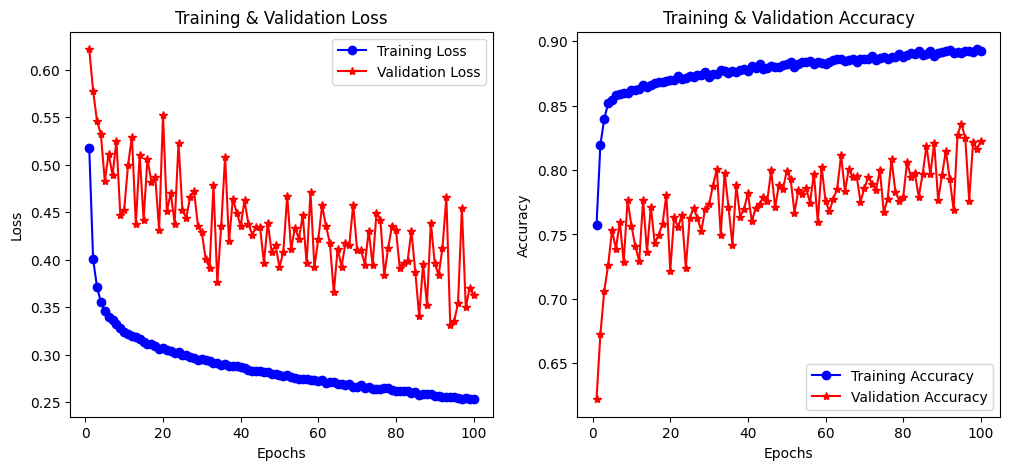

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8607 - loss: 0.3144
Training model: nodes=64, dropout=0.2, lr=0.01, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7955 - loss: 0.4515 - val_accuracy: 0.7083 - val_loss: 0.4992
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.3708 - val_accuracy: 0.7760 - val_loss: 0.4389
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8441 - loss: 0.3707 - val_accuracy: 0.6986 - val_loss: 0.5376
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8481 - loss: 0.3598 - val_accuracy: 0.6972 - val_loss: 0.5153
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3443 - val_accuracy: 0.7043 - val_loss: 0.5101
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.3527 - val_accuracy: 0.7198 - val_loss: 0.4327
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3531 

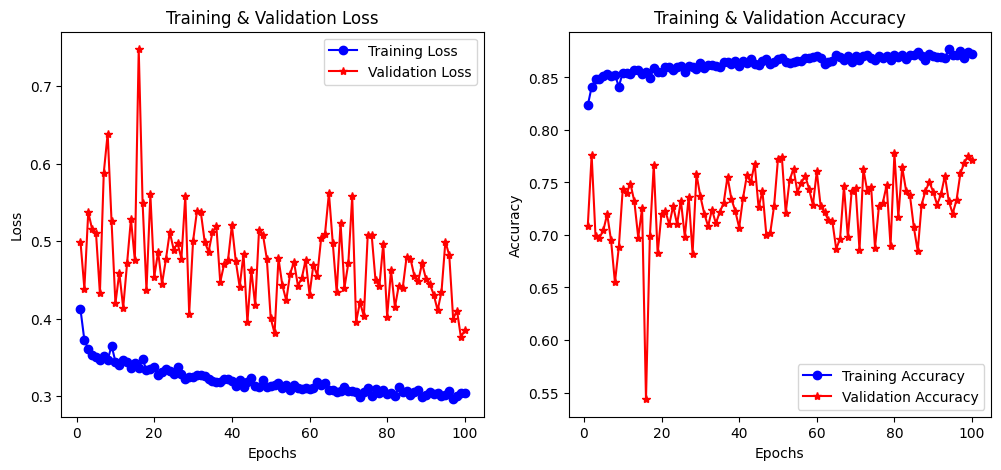

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8722 - loss: 0.2947
Training model: nodes=64, dropout=0.2, lr=0.01, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.4544 - val_accuracy: 0.7585 - val_loss: 0.4935
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8431 - loss: 0.3722 - val_accuracy: 0.7090 - val_loss: 0.5023
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.3648 - val_accuracy: 0.7289 - val_loss: 0.4684
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.3401 - val_accuracy: 0.7578 - val_loss: 0.4237
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8523 - loss: 0.3403 - val_accuracy: 0.7686 - val_loss: 0.3950
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8521 - loss: 0.3466 - val_accuracy: 0.7312 - val_loss: 0.4896
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8572 - loss: 0.3392 

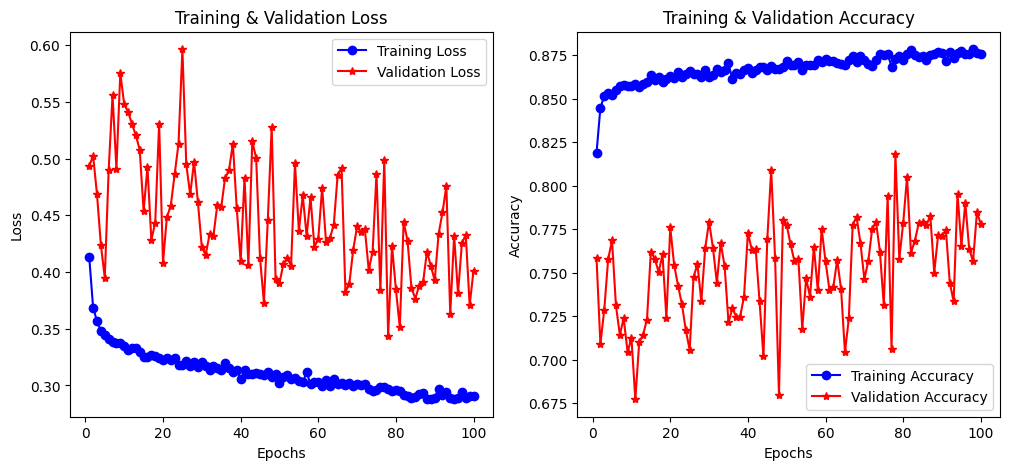

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8752 - loss: 0.2993
Training model: nodes=64, dropout=0.2, lr=0.01, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7904 - loss: 0.4578 - val_accuracy: 0.7191 - val_loss: 0.5478
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8411 - loss: 0.3704 - val_accuracy: 0.6820 - val_loss: 0.6229
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.3527 - val_accuracy: 0.7504 - val_loss: 0.4598
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3454 - val_accuracy: 0.7211 - val_loss: 0.5032
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8524 - loss: 0.3496 - val_accuracy: 0.7073 - val_loss: 0.5940
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3519 - val_accuracy: 0.7326 - val_loss: 0.4617
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3259 - val_accurac

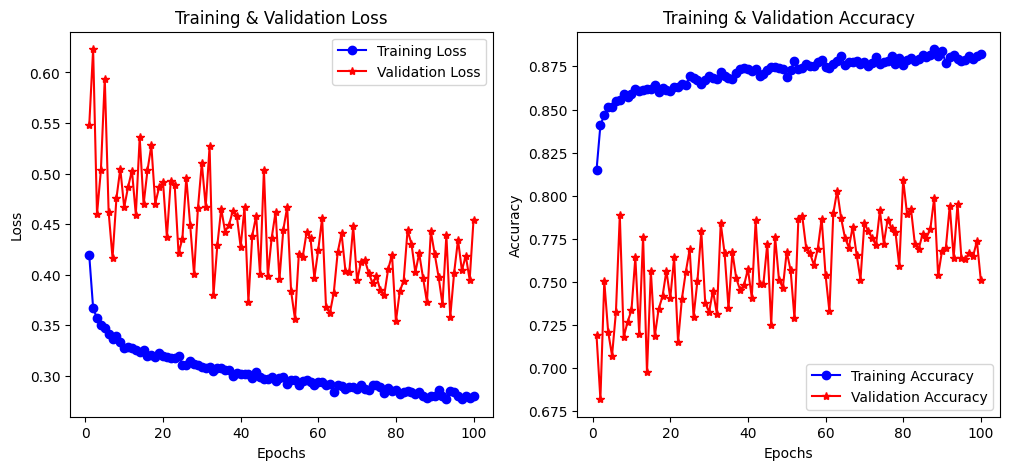

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8715 - loss: 0.3001
Training model: nodes=64, dropout=0.2, lr=0.005, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7754 - loss: 0.4533 - val_accuracy: 0.6659 - val_loss: 0.5852
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3686 - val_accuracy: 0.7396 - val_loss: 0.4667
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8550 - loss: 0.3496 - val_accuracy: 0.7225 - val_loss: 0.5354
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8516 - loss: 0.3496 - val_accuracy: 0.7009 - val_loss: 0.5609
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8541 - loss: 0.3501 - val_accuracy: 0.7124 - val_loss: 0.4727
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3549 - val_accuracy: 0.7420 - val_loss: 0.4733
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 0.3368

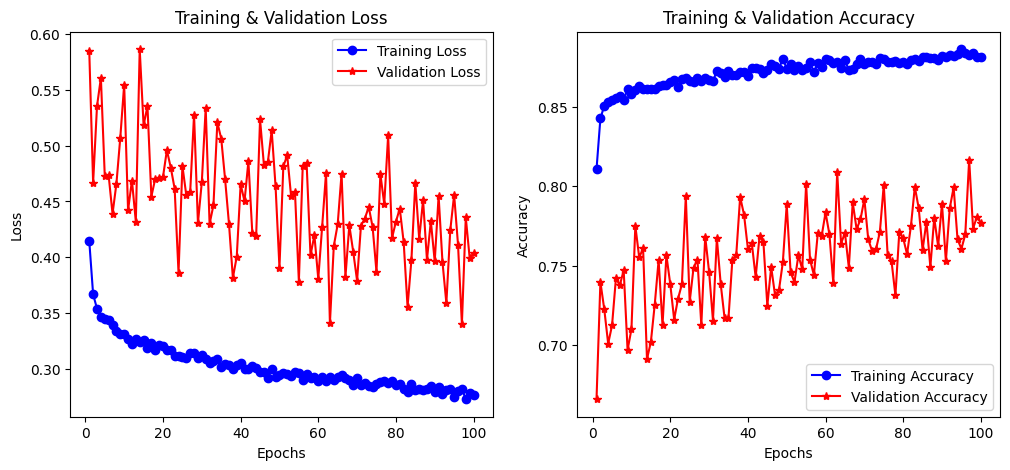

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8703 - loss: 0.2938
Training model: nodes=64, dropout=0.2, lr=0.005, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7869 - loss: 0.4532 - val_accuracy: 0.6507 - val_loss: 0.6738
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.3802 - val_accuracy: 0.7440 - val_loss: 0.5274
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8529 - loss: 0.3516 - val_accuracy: 0.7295 - val_loss: 0.5299
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8564 - loss: 0.3410 - val_accuracy: 0.7090 - val_loss: 0.5621
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8560 - loss: 0.3358 - val_accuracy: 0.7215 - val_loss: 0.4956
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.3254 - val_accuracy: 0.7235 - val_loss: 0.5064
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.3316

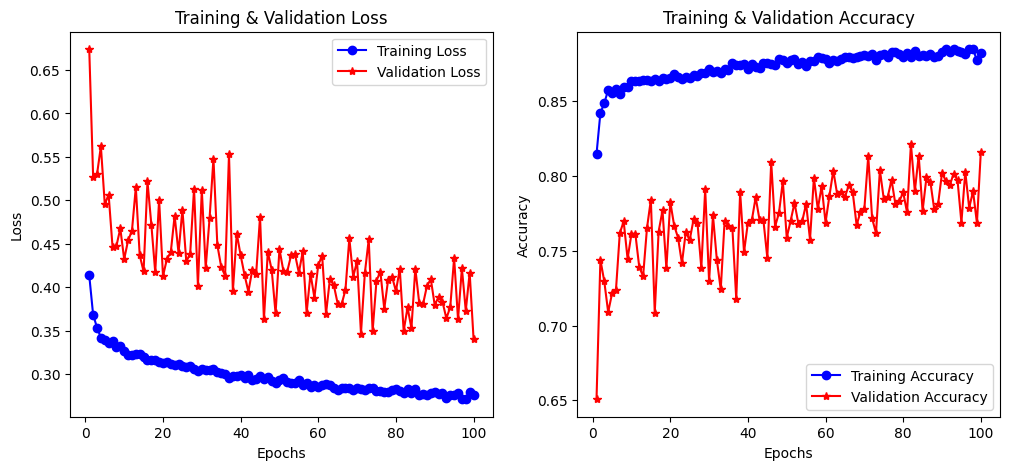

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8693 - loss: 0.2949
Training model: nodes=64, dropout=0.2, lr=0.005, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7653 - loss: 0.4883 - val_accuracy: 0.7036 - val_loss: 0.5474
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8267 - loss: 0.3932 - val_accuracy: 0.6699 - val_loss: 0.6648
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8406 - loss: 0.3707 - val_accuracy: 0.7305 - val_loss: 0.5180
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3575 - val_accuracy: 0.7363 - val_loss: 0.5217
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.3462 - val_accuracy: 0.6770 - val_loss: 0.6113
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.3458 - val_accuracy: 0.7184 - val_loss: 0.5379
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8517 - loss: 0.3436 - val_accura

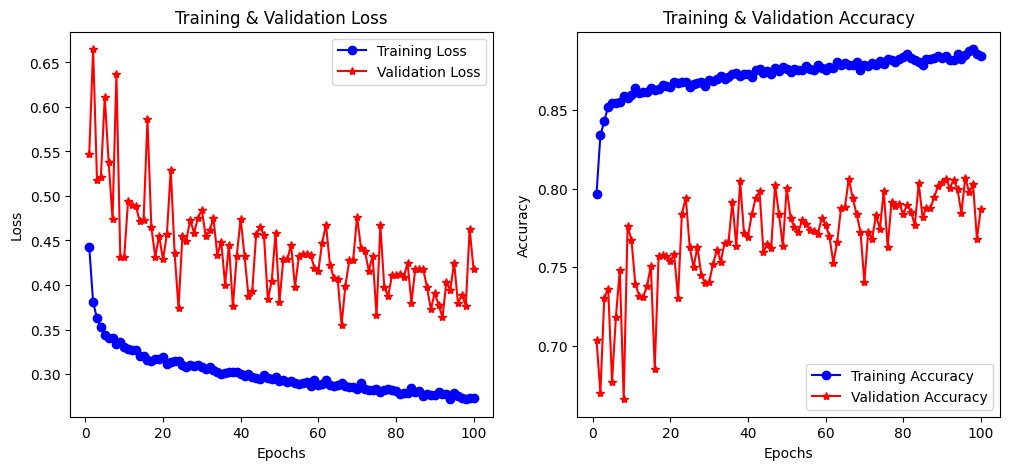

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8746 - loss: 0.2921
Training model: nodes=64, dropout=0.2, lr=0.001, batch_size=32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7575 - loss: 0.5191 - val_accuracy: 0.6736 - val_loss: 0.5886
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.3927 - val_accuracy: 0.6777 - val_loss: 0.6064
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8374 - loss: 0.3851 - val_accuracy: 0.7302 - val_loss: 0.5272
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.3694 - val_accuracy: 0.7215 - val_loss: 0.5563
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8463 - loss: 0.3632 - val_accuracy: 0.7447 - val_loss: 0.4853
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8481 - loss: 0.3629 - val_accuracy: 0.7410 - val_loss: 0.5045
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8508 - loss: 0.3533

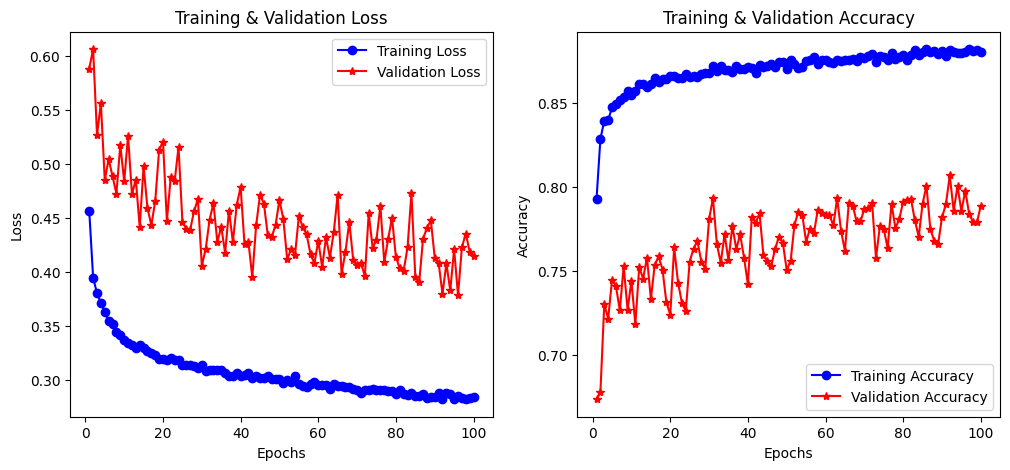

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8691 - loss: 0.2920
Training model: nodes=64, dropout=0.2, lr=0.001, batch_size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6880 - loss: 0.5689 - val_accuracy: 0.6076 - val_loss: 0.6643
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8115 - loss: 0.4220 - val_accuracy: 0.6831 - val_loss: 0.5735
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8285 - loss: 0.3977 - val_accuracy: 0.7053 - val_loss: 0.5700
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8395 - loss: 0.3729 - val_accuracy: 0.7093 - val_loss: 0.5559
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8411 - loss: 0.3733 - val_accuracy: 0.6891 - val_loss: 0.5991
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8425 - loss: 0.3653 - val_accuracy: 0.7258 - val_loss: 0.5415
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8502 - loss: 0.3445

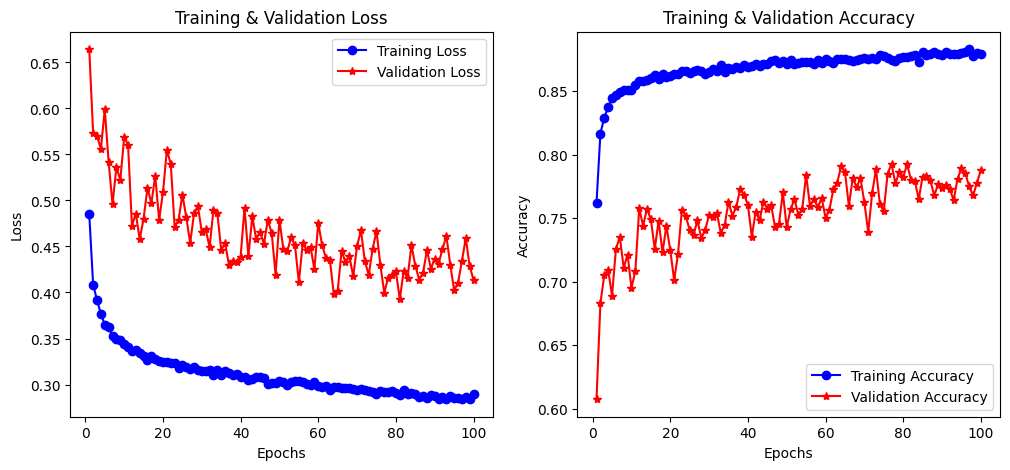

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8719 - loss: 0.2929
Training model: nodes=64, dropout=0.2, lr=0.001, batch_size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6496 - loss: 0.6098 - val_accuracy: 0.6342 - val_loss: 0.6328
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4364 - val_accuracy: 0.6595 - val_loss: 0.6015
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8142 - loss: 0.4165 - val_accuracy: 0.6743 - val_loss: 0.5877
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8318 - loss: 0.3943 - val_accuracy: 0.6986 - val_loss: 0.5523
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8351 - loss: 0.3828 - val_accuracy: 0.7043 - val_loss: 0.5571
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8421 - loss: 0.3738 - val_accuracy: 0.7188 - val_loss: 0.5399
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8437 - loss: 0.3622 - val_accura

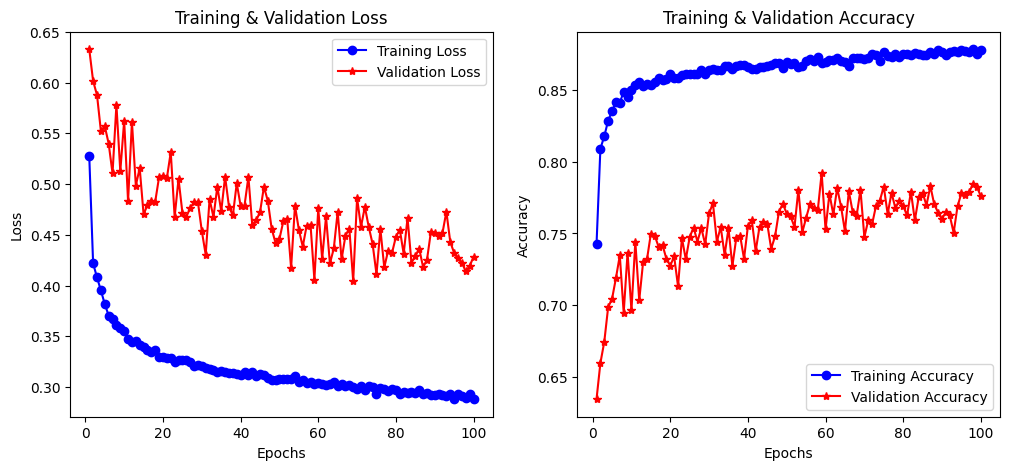

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8759 - loss: 0.2911
Best model validation loss: 0.2824627757072449


In [23]:
epochs = 100
least_val_loss = float('inf')  # Initialize to a high value
best_model = None  # To store the best model

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"Training model: nodes={num_nodes}, dropout={dropout_prob}, lr={lr}, batch_size={batch_size}")
                
                # Train the model
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

                # Plot the training history
                plot_training_history(history)
                
                # Evaluate model
                val_loss = model.evaluate(x_valid, y_valid)[0]
                
                # Update the best model if validation loss improves
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_model = model  # Store the best model

print(f"Best model validation loss: {least_val_loss}")



In [24]:
y_pred = best_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


array([1, 1, 1, ..., 1, 0, 0])